In [2]:
!pip install pandas openpyxl
!pip install seaborn
!pip install scikit-learn
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install category_encoders


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Checking Variables in our dataset

**Exploratory Data Analysis**

In [5]:
import pandas as pd

# Load the Excel file

file_path = r"C:\Users\karti\OneDrive\Desktop\Car Price\train (1).csv"
df = pd.read_csv(file_path)

# Display the contents
display(df)  # Works better in Jupyter Notebook

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,67,0,mazda rx-7 gs,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72,4200,31,39,18344.0
1,112,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0
2,154,0,toyota corona hardtop,gas,std,four,wagon,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,37,6918.0
3,97,1,nissan latio,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7499.0
4,39,0,honda civic 1300,gas,std,two,hatchback,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,9095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,107,1,nissan clipper,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399.0
160,15,1,bmw z4,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565.0
161,93,1,nissan latio,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6849.0
162,180,3,toyota corona,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161,5200,19,24,15998.0


In [6]:
missing_values = df.isnull().sum()

# Display only columns with missing values
print(missing_values)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


We see that there are no null values in our dataset

In [7]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,101.865854,0.902439,98.728659,174.127439,65.922561,53.715854,2556.439024,126.414634,3.320854,3.254909,10.089085,104.701220,5144.207317,25.073171,30.573171,13223.414634
std,59.942664,1.244470,5.968884,12.080544,2.123469,2.479386,511.935461,40.469014,0.269766,0.317892,3.854172,40.228058,493.839328,6.164972,6.435199,7746.206406
min,1.000000,-2.000000,86.600000,144.600000,61.800000,47.800000,1819.000000,70.000000,2.540000,2.070000,7.000000,52.000000,4150.000000,13.000000,16.000000,5118.000000
25%,48.750000,0.000000,94.500000,166.675000,64.175000,51.900000,2163.000000,98.000000,3.150000,3.110000,8.600000,71.500000,4800.000000,19.000000,25.000000,7705.750000
50%,105.500000,1.000000,96.750000,173.100000,65.500000,54.100000,2422.500000,119.500000,3.310000,3.280000,9.000000,95.000000,5200.000000,24.000000,30.000000,10646.500000
75%,152.500000,2.000000,102.100000,183.200000,66.675000,55.525000,2939.250000,141.000000,3.540000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16525.750000
max,205.000000,3.000000,115.600000,202.600000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,45.000000,50.000000,45400.000000


In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
159    False
160    False
161    False
162    False
163    False
Length: 164, dtype: bool

In [10]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [11]:
df.columns = df.columns.str.lower()
df.dtypes

car_id                int64
symboling             int64
carname              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [12]:
df.nunique()

car_id              164
symboling             6
carname             124
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            47
carlength            65
carwidth             42
carheight            48
curbweight          140
enginetype            7
cylindernumber        6
enginesize           41
fuelsystem            8
boreratio            37
stroke               35
compressionratio     31
horsepower           54
peakrpm              23
citympg              27
highwaympg           28
price               155
dtype: int64

In [13]:
df.corr(numeric_only=True)

,car_id,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_id,1.000000,-0.127075,0.142974,0.179696,0.071304,0.249383,0.113068,-0.003727,0.281138,-0.116890,0.171055,0.039555,-0.213326,0.019816,0.008566,-0.051834
symboling,-0.127075,1.000000,-0.528537,-0.335504,-0.186281,-0.537134,-0.184052,-0.039269,-0.070107,-0.061278,-0.180829,0.128578,0.281082,-0.109415,-0.028980,-0.005183
wheelbase,0.142974,-0.528537,1.000000,0.866698,0.764103,0.581916,0.745331,0.481618,0.433266,0.157902,0.251836,0.275268,-0.378718,-0.408155,-0.492094,0.506118
carlength,0.179696,-0.335504,0.866698,1.000000,0.823844,0.464789,0.865988,0.633826,0.557450,0.116709,0.161260,0.499984,-0.319409,-0.630014,-0.668099,0.652071
carwidth,0.071304,-0.186281,0.764103,0.823844,1.000000,0.234230,0.844845,0.703285,0.525516,0.145958,0.145192,0.615127,-0.212651,-0.623366,-0.653735,0.744310
carheight,0.249383,-0.537134,0.581916,0.464789,0.234230,1.000000,0.246243,-0.026308,0.129539,-0.049320,0.245437,-0.172079,-0.317616,0.003616,-0.061748,0.044458
curbweight,0.113068,-0.184052,0.745331,0.865988,0.844845,0.246243,1.000000,0.835859,0.625552,0.123118,0.123001,0.726687,-0.280475,-0.752704,-0.793748,0.824212
enginesize,-0.003727,-0.039269,0.481618,0.633826,0.703285,-0.026308,0.835859,1.000000,0.558890,0.162581,0.006985,0.804452,-0.243986,-0.654364,-0.671103,0.866433
boreratio,0.281138,-0.070107,0.433266,0.557450,0.525516,0.129539,0.625552,0.558890,1.000000,-0.064631,0.007323,0.551756,-0.272562,-0.563072,-0.561621,0.546099
stroke,-0.116890,-0.061278,0.157902,0.116709,0.145958,-0.049320,0.123118,0.162581,-0.064631,1.000000,0.162952,0.032248,-0.038711,-0.003988,-0.002718,0.023941


In [14]:
df['car_id'].nunique() == len(df)
df = df.drop(columns=['car_id', 'carname'])

In [15]:
df.head(10)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,...,134,idi,3.43,3.64,22.0,72,4200,31,39,18344.0
1,0,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0
2,0,gas,std,four,wagon,fwd,front,95.7,169.7,63.6,...,92,2bbl,3.05,3.03,9.0,62,4800,31,37,6918.0
3,1,gas,std,four,sedan,fwd,front,94.5,165.3,63.8,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7499.0
4,0,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,9095.0
5,1,gas,std,four,hatchback,fwd,front,93.7,157.3,63.8,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229.0
6,2,gas,std,two,hatchback,fwd,front,93.7,157.9,63.6,...,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7053.0
7,0,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,...,152,idi,3.70,3.52,21.0,95,4150,28,33,16900.0
8,3,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,...,156,mfi,3.60,3.90,7.0,145,5000,19,24,12964.0
9,1,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6295.0


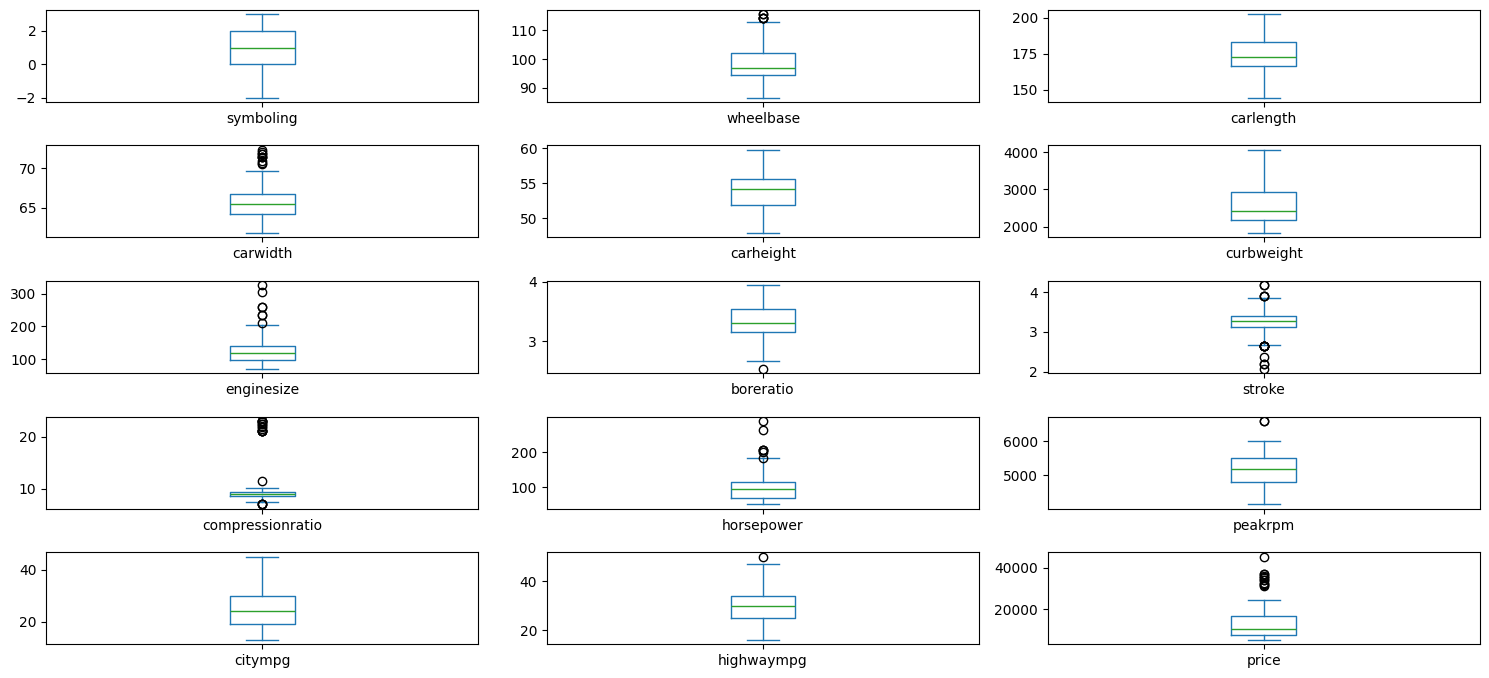

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_cols = df.select_dtypes(include='number')

# Create boxplots
numerical_cols.plot(kind='box', subplots=True, layout=(len(numerical_cols.columns) // 3 + 1, 3), figsize=(15, 8), sharex=False)
plt.tight_layout()
plt.show()


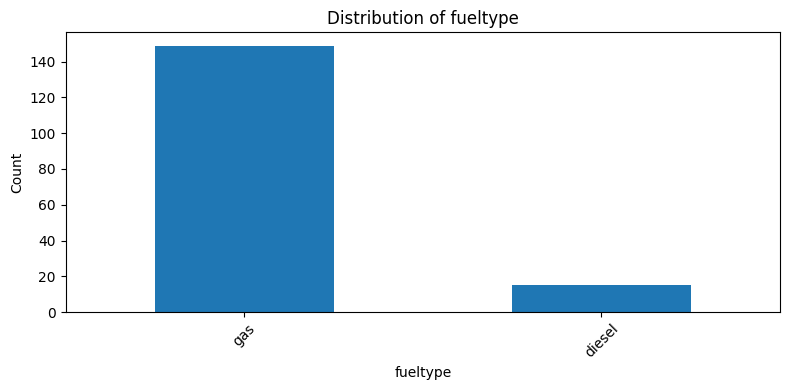

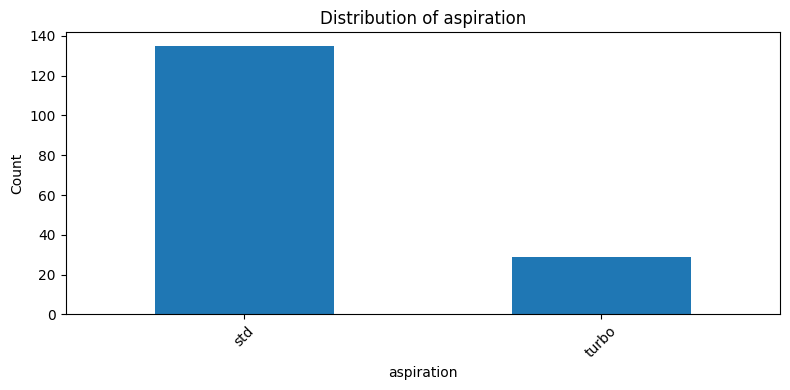

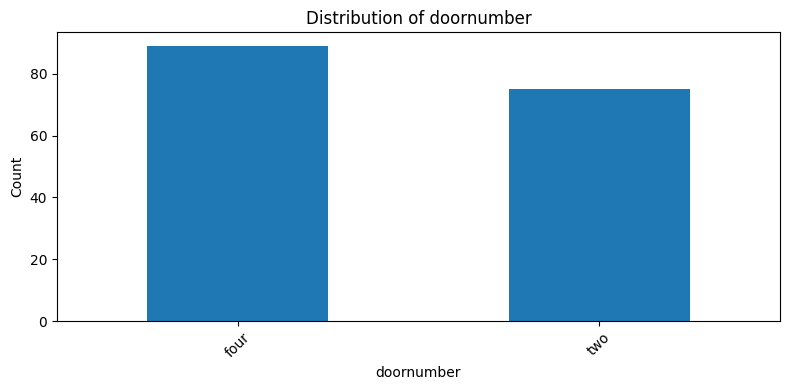

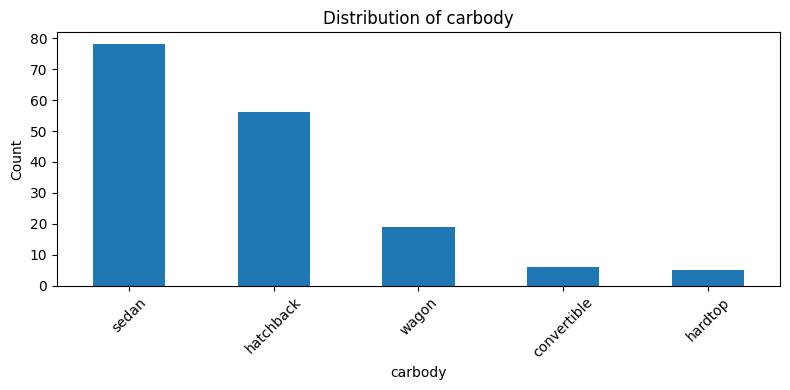

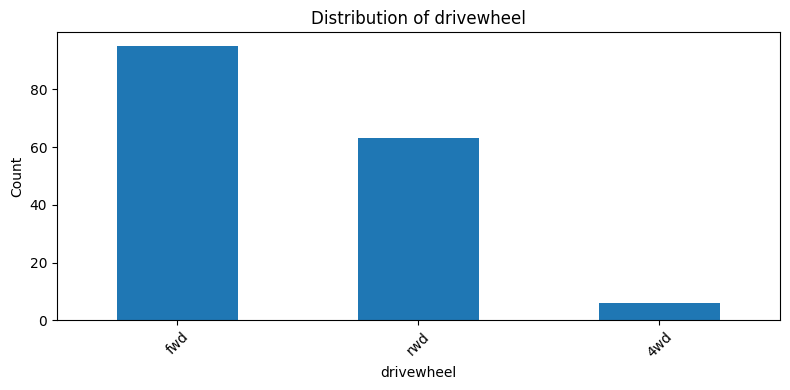

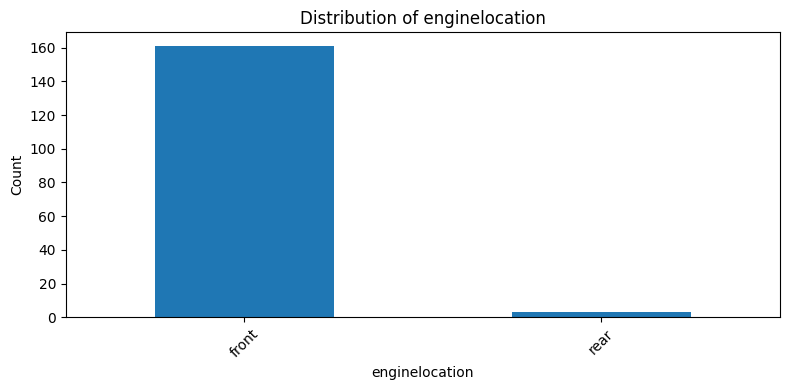

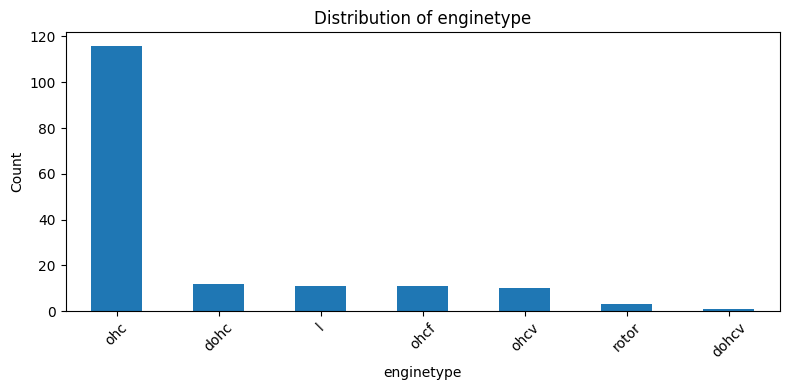

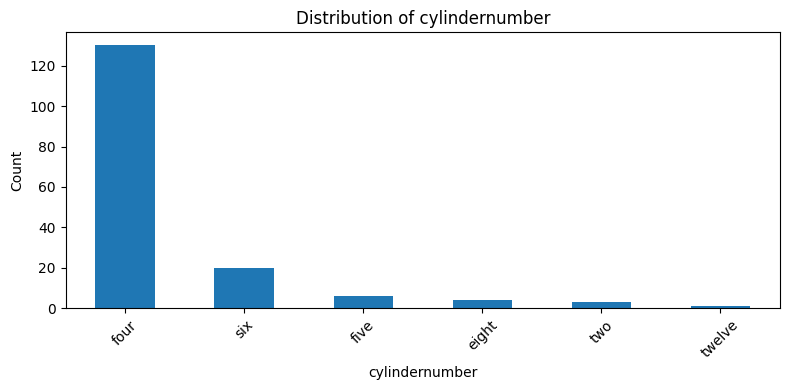

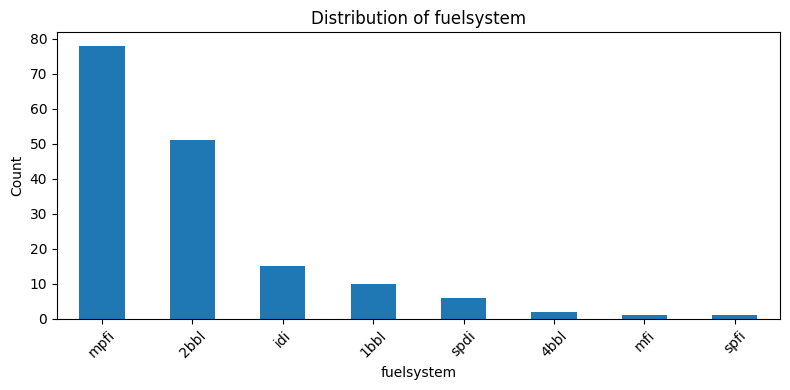

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only object (categorical/text) columns
object_cols = df.select_dtypes(include='object')

# Create bar plots for each column
for col in object_cols.columns:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Counting Outliers in Numerical Columns

In [18]:
import pandas as pd

# Select numeric columns
numeric_df = df.select_dtypes(include='number')

outlier_counts = {}

for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    count = ((numeric_df[col] < lower_bound) | (numeric_df[col] > upper_bound)).sum()
    outlier_counts[col] = count

# Convert to DataFrame for easier view
outliers_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['outlier_count'])
print(outliers_df.sort_values(by='outlier_count', ascending=False))


                  outlier_count
compressionratio             20
stroke                       16
price                        12
carwidth                     10
horsepower                    7
enginesize                    7
wheelbase                     6
peakrpm                       2
boreratio                     1
highwaympg                    1
carlength                     0
curbweight                    0
carheight                     0
symboling                     0
citympg                       0


In [19]:
print(len(df))

164


In [20]:
# Set the threshold
threshold = 10

# Get columns with outlier count below threshold
columns_to_drop_outliers = [col for col, count in outlier_counts.items() if count < threshold]

# Create a mask to identify outlier rows for those columns
outlier_mask = pd.Series(False, index=numeric_df.index)

for col in columns_to_drop_outliers:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_mask |= (numeric_df[col] < lower_bound) | (numeric_df[col] > upper_bound)
# Drop the rows from the original df
clean_df = df[~outlier_mask]


In [21]:
import pandas as pd

# Select numeric columns
numeric_df = clean_df.select_dtypes(include='number')

outlier_counts = {}

for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    count = ((numeric_df[col] < lower_bound) | (numeric_df[col] > upper_bound)).sum()
    outlier_counts[col] = count

# Convert to DataFrame for easier view
outliers_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['outlier_count'])
print(outliers_df.sort_values(by='outlier_count', ascending=False))


                  outlier_count
compressionratio             23
stroke                       16
carwidth                      3
carlength                     1
carheight                     0
wheelbase                     0
symboling                     0
enginesize                    0
curbweight                    0
boreratio                     0
horsepower                    0
peakrpm                       0
citympg                       0
highwaympg                    0
price                         0


In [22]:
print("Original:", len(df))
print("After clean:", len(clean_df))

Original: 164
After clean: 143


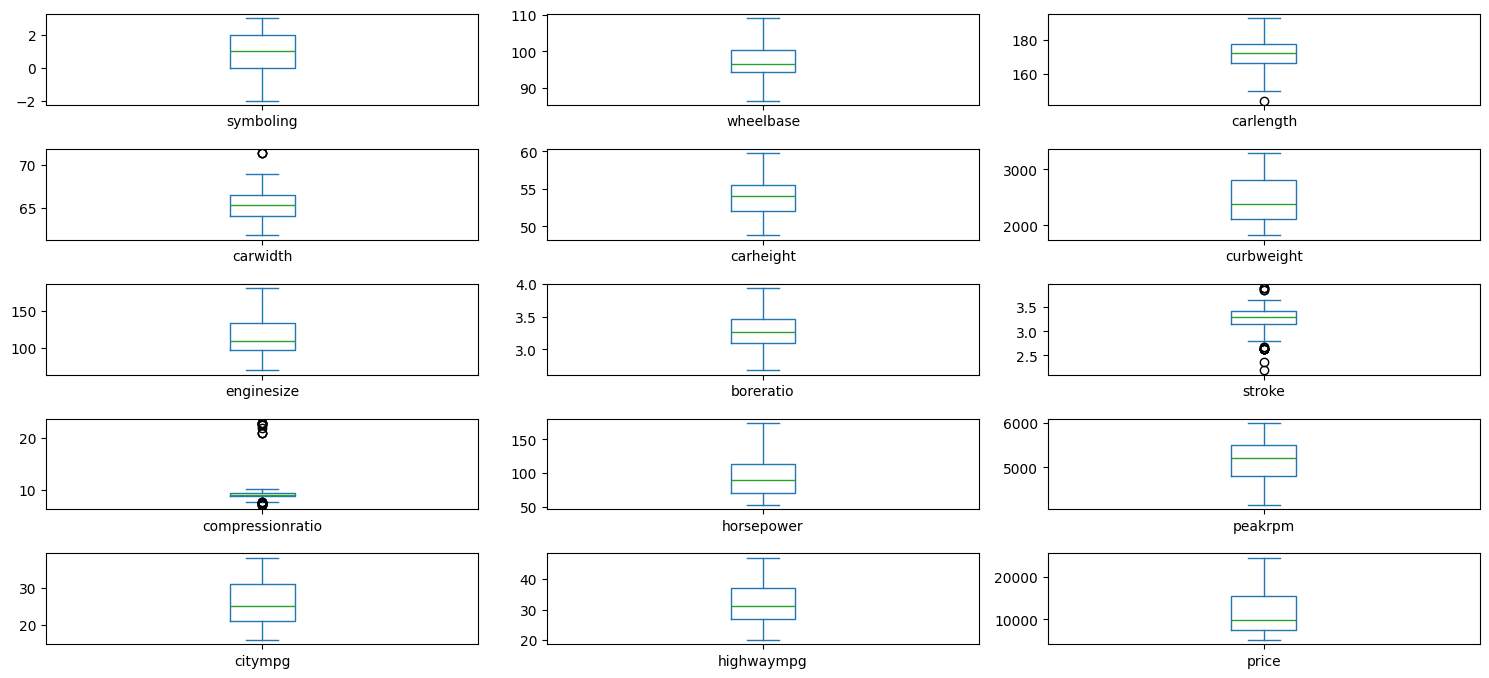

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_cols = clean_df.select_dtypes(include='number')

# Create boxplots
numerical_cols.plot(kind='box', subplots=True, layout=(len(numerical_cols.columns) // 3 + 1, 3), figsize=(15, 8), sharex=False)
plt.tight_layout()
plt.show()


FEATURE ENGINEERING

In [24]:
object_cols = clean_df.select_dtypes(include='object')

summary = pd.DataFrame({
    'dtype': object_cols.dtypes,
    'n_unique': object_cols.nunique(),
    'unique_values': object_cols.apply(lambda x: x.unique())
})

print(summary)


                 dtype  n_unique  \
fueltype        object         2   
aspiration      object         2   
doornumber      object         2   
carbody         object         5   
drivewheel      object         3   
enginelocation  object         1   
enginetype      object         6   
cylindernumber  object         4   
fuelsystem      object         8   

                                                  unique_values  
fueltype                                          [diesel, gas]  
aspiration                                         [std, turbo]  
doornumber                                          [four, two]  
carbody         [sedan, wagon, hatchback, hardtop, convertible]  
drivewheel                                      [rwd, fwd, 4wd]  
enginelocation                                          [front]  
enginetype                    [ohc, l, ohcf, dohc, rotor, ohcv]  
cylindernumber                           [four, six, five, two]  
fuelsystem       [idi, mpfi, 2bbl, 1bbl, mfi,

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to fueltype, aspiration, drivewheel, and enginelocation
clean_df.loc[:, 'fueltype'] = label_encoder.fit_transform(clean_df['fueltype'])
clean_df.loc[:, 'aspiration'] = label_encoder.fit_transform(clean_df['aspiration'])
clean_df.loc[:, 'drivewheel'] = label_encoder.fit_transform(clean_df['drivewheel'])
clean_df.loc[:, 'enginelocation'] = label_encoder.fit_transform(clean_df['enginelocation'])

# For Ordinal Encoding, let's manually encode cylindernumber and doornumber
# Strip whitespace and convert to lowercase for safe mapping
clean_df['cylindernumber'] = clean_df['cylindernumber'].str.strip().str.lower()
clean_df['doornumber'] = clean_df['doornumber'].str.strip().str.lower()

# Now apply the ordinal mapping
cylindernumber_order = {
    'two': 0, 'three': 1, 'four': 2, 'five': 3, 'six': 4, 'eight': 5, 'twelve': 6
}

doornumber_order = {
    'two': 0, 'four': 1
}

clean_df.loc[:, 'cylindernumber'] = clean_df['cylindernumber'].map(cylindernumber_order)
clean_df.loc[:, 'doornumber'] = clean_df['doornumber'].map(doornumber_order)

# Apply Target Encoding for carbody, enginetype, and fuelsystem
# Assuming 'price' is the target variable (make sure the target column exists in your dataset)
target_variable = 'price'

encoder = ce.TargetEncoder(cols=['carbody', 'enginetype', 'fuelsystem'])
clean_df_encoded = encoder.fit_transform(clean_df.drop(columns=[target_variable]), clean_df[target_variable])

# Add the target column back to the DataFrame
clean_df_encoded[target_variable] = clean_df[target_variable]

# Print the encoded DataFrame to verify
print(clean_df_encoded.head())

# Now clean_df_encoded is ready for machine learning models
# Split the data into features and target
X = clean_df_encoded.drop(columns=[target_variable])
y = clean_df_encoded[target_variable]

len(clean_df)

   symboling fueltype aspiration doornumber       carbody drivewheel  \
0          0        0          0          1  12222.963758          2   
1          0        1          0          1  12222.963758          2   
2          0        1          0          1  11457.390467          1   
3          1        1          0          1  12222.963758          1   
4          0        1          0          0   9999.484613          1   

  enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
0              0      104.9      175.0      66.1  ...         134   
1              0      107.9      186.7      68.4  ...         120   
2              0       95.7      169.7      63.6  ...          92   
3              0       94.5      165.3      63.8  ...          97   
4              0       96.5      167.5      65.2  ...         110   

     fuelsystem  boreratio stroke  compressionratio  horsepower  peakrpm  \
0  12014.725027       3.43   3.64              22.0          72     4200   


C:\Users\karti\AppData\Local\Temp\ipykernel_10380\3961719565.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['cylindernumber'] = clean_df['cylindernumber'].str.strip().str.lower()
C:\Users\karti\AppData\Local\Temp\ipykernel_10380\3961719565.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['doornumber'] = clean_df['doornumber'].str.strip().str.lower()


143

In [26]:
# # List of the columns to display
columns_to_display = ['fueltype', 'aspiration', 'drivewheel', 'enginelocation',
                      'cylindernumber', 'doornumber', 'carbody', 'enginetype', 'fuelsystem']

# Display the selected columns
print(clean_df[columns_to_display].head())  # Display the first few rows of the specified columns
# print("Unique values in 'cylindernumber':", df['cylindernumber'].unique())
# print("Unique values in 'doornumber':", df['doornumber'].unique())
# print(clean_df['cylindernumber'].dtype)
# print(clean_df['doornumber'].dtype)

# print(clean_df['cylindernumber'].unique())
# print(clean_df['doornumber'].unique())

  fueltype aspiration drivewheel enginelocation cylindernumber doornumber  \
0        0          0          2              0              2          1   
1        1          0          2              0              2          1   
2        1          0          1              0              2          1   
3        1          0          1              0              2          1   
4        1          0          1              0              2          0   

     carbody enginetype fuelsystem  
0      sedan        ohc        idi  
1      sedan          l       mpfi  
2      wagon        ohc       2bbl  
3      sedan        ohc       2bbl  
4  hatchback        ohc       1bbl  


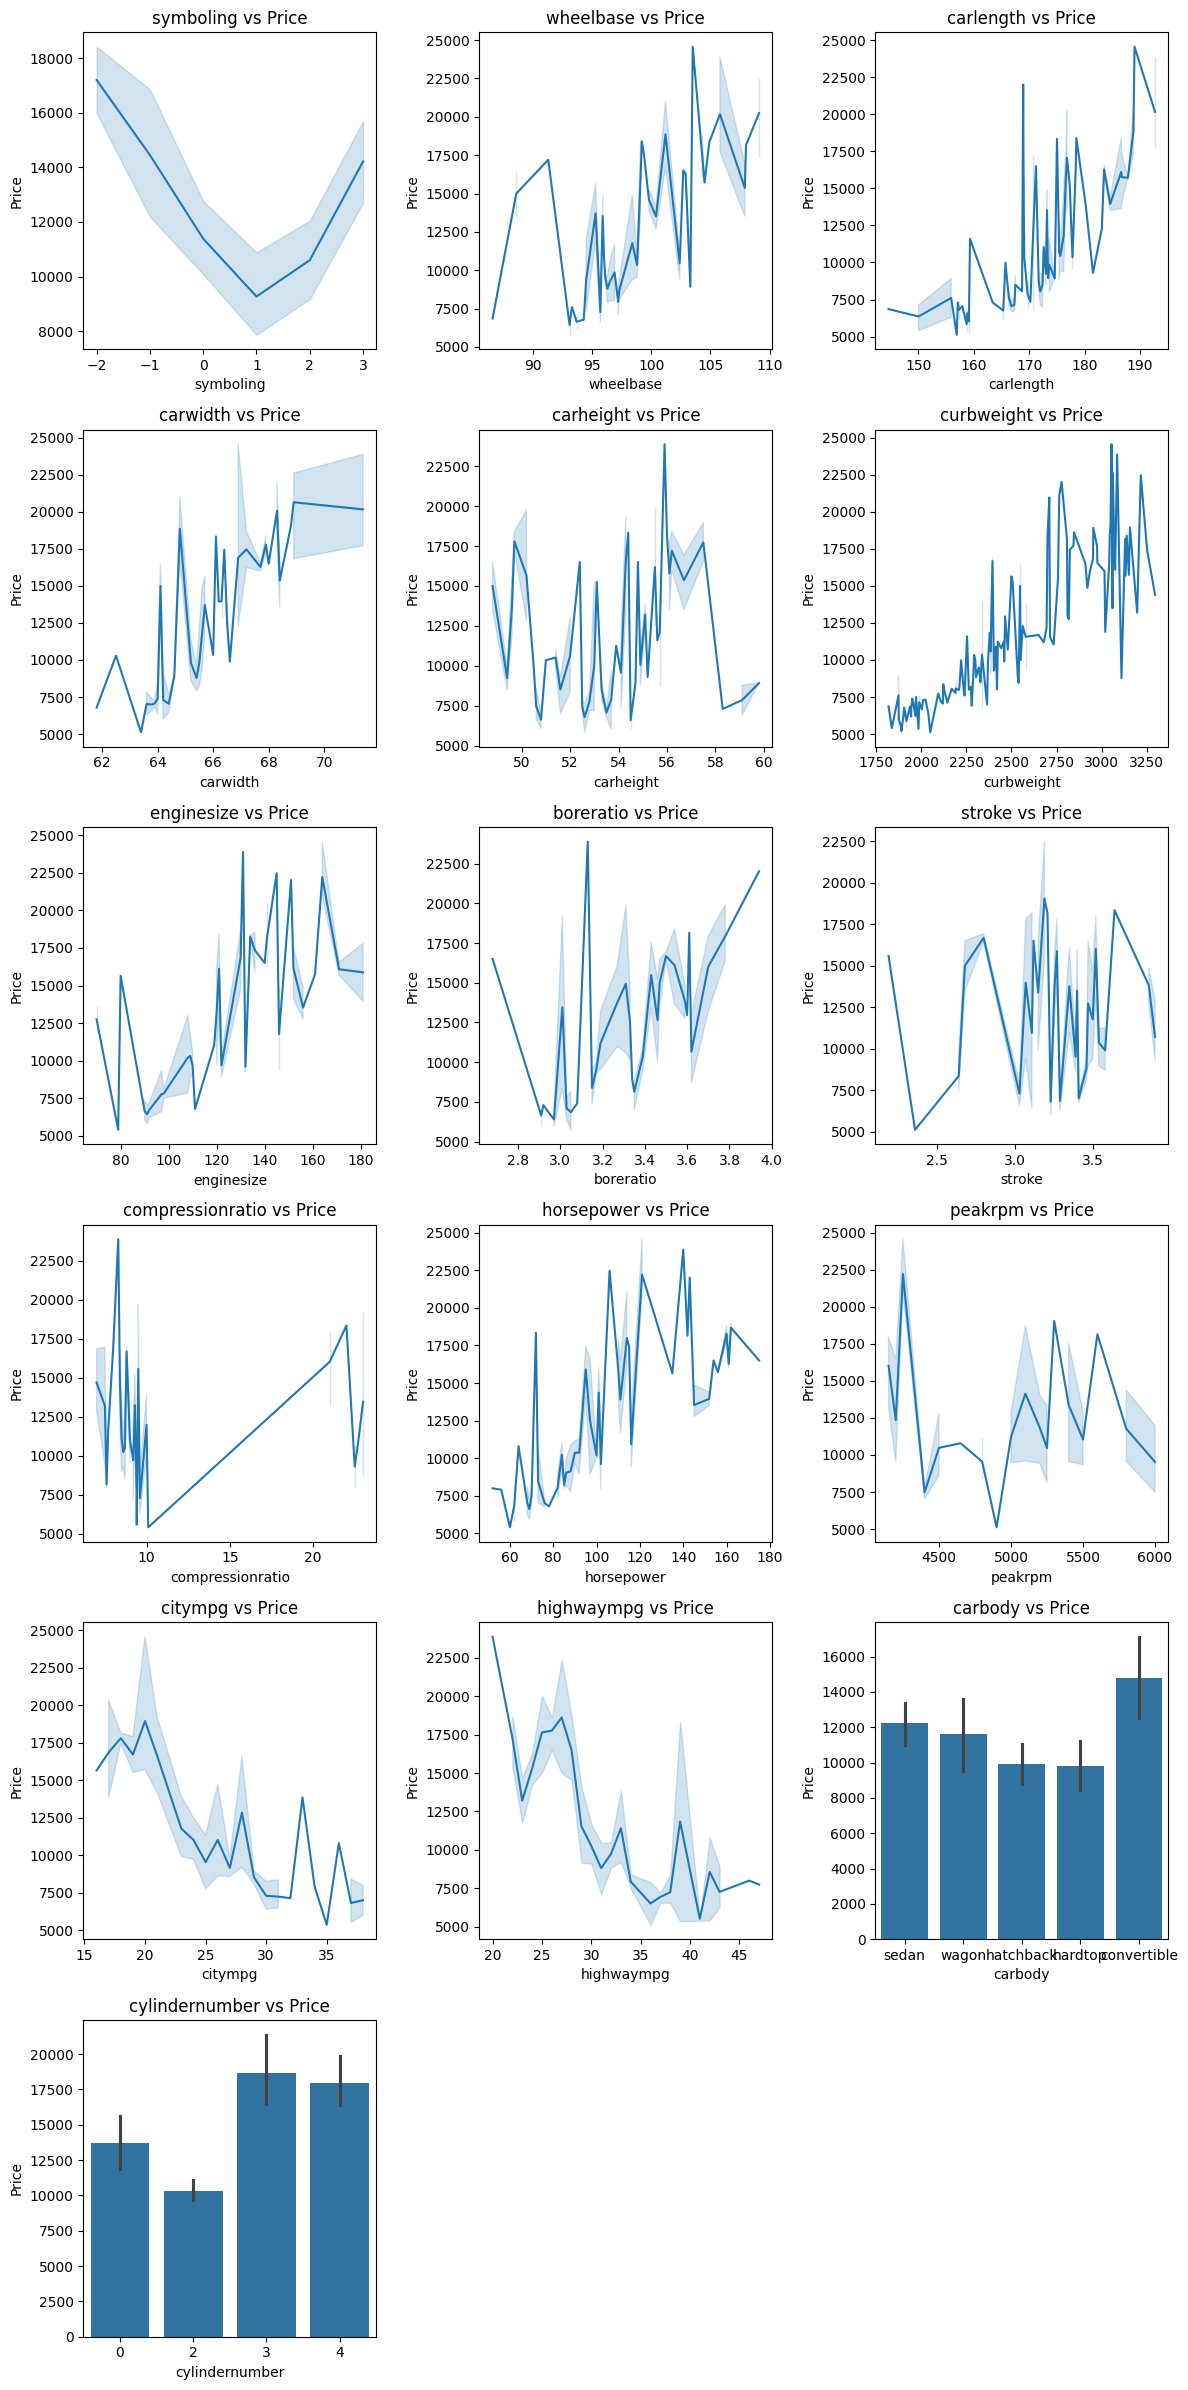

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical columns from clean_df (excluding the target 'price')
numerical_cols = clean_df.select_dtypes(include=['number']).columns.tolist()

# Remove 'price' from the list of numerical columns
numerical_cols = [col for col in numerical_cols if col != 'price']

# Get the categorical columns with 4-5 unique values (after encoding)
categorical_cols = clean_df.select_dtypes(include=['object']).columns.tolist()
categorical_4_5 = [col for col in categorical_cols if clean_df[col].nunique() in [4, 5]]

# Calculate the number of subplots needed for numerical columns
num_plots = len(numerical_cols) + len(categorical_4_5)
num_rows = int(np.ceil(num_plots / 3))  # Automatically determine number of rows
num_cols = 3  # Keep 3 columns for the subplots

# Create the figure and axes dynamically
plt.figure(figsize=(12, 4 * num_rows))

# Plot line plots for numerical columns
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)  # Create a subplot for each numerical column
    sns.lineplot(x=clean_df[col], y=clean_df['price'])
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')

# Plot bar charts for categorical columns with 4-5 unique values
for i, col in enumerate(categorical_4_5):
    plt.subplot(num_rows, num_cols, len(numerical_cols) + i + 1)  # Create a subplot for each categorical column
    sns.barplot(x=clean_df[col], y=clean_df['price'])
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()


In [28]:
# List of columns that were encoded
encoded_columns = ['fueltype', 'aspiration', 'drivewheel', 'enginelocation', 'cylindernumber', 'doornumber','carbody','enginetype','fuelsystem']

# Display the encoded columns
encoded_data = clean_df[encoded_columns]

# Print the encoded columns' data
# print(encoded_data.head())  # Display the first few rows
print(encoded_data.head(5))

['fueltype', 'aspiration', 'drivewheel', 'enginelocation', 'cylindernumber', 'doornumber']
['carbody','enginetype','fuelsystem']

  fueltype aspiration drivewheel enginelocation cylindernumber doornumber  \
0        0          0          2              0              2          1   
1        1          0          2              0              2          1   
2        1          0          1              0              2          1   
3        1          0          1              0              2          1   
4        1          0          1              0              2          0   

     carbody enginetype fuelsystem  
0      sedan        ohc        idi  
1      sedan          l       mpfi  
2      wagon        ohc       2bbl  
3      sedan        ohc       2bbl  
4  hatchback        ohc       1bbl  


['carbody', 'enginetype', 'fuelsystem']

In [29]:
# Target encoding for carbody
clean_df['carbody'] = clean_df.groupby('carbody')['price'].transform('mean')

# Target encoding for enginetype
clean_df['enginetype'] = clean_df.groupby('enginetype')['price'].transform('mean')

# Target encoding for fuelsystem
clean_df['fuelsystem'] = clean_df.groupby('fuelsystem')['price'].transform('mean')


C:\Users\karti\AppData\Local\Temp\ipykernel_10380\3816498210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['carbody'] = clean_df.groupby('carbody')['price'].transform('mean')
C:\Users\karti\AppData\Local\Temp\ipykernel_10380\3816498210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['enginetype'] = clean_df.groupby('enginetype')['price'].transform('mean')
C:\Users\karti\AppData\Local\Temp\ipykernel_10380\3816498210.py:8: SettingWithCopyWarning: 
A value is trying to be set on a c

In [30]:
print(clean_df[['carbody', 'enginetype', 'fuelsystem']].head())

        carbody    enginetype    fuelsystem
0  12228.707143  10715.843750  13599.090909
1  12228.707143  15758.571429  14905.180328
2  11600.533333  10715.843750   7391.068627
3  12228.707143  10715.843750   7391.068627
4   9943.596154  10715.843750   7663.200000


In [31]:
encoded_columns = ['fueltype', 'aspiration', 'drivewheel', 'enginelocation', 'cylindernumber', 'doornumber','carbody','enginetype','fuelsystem']

# Display the encoded columns
encoded_data = clean_df[encoded_columns]
encoded_data.head(10)
clean_df.head(10)
clean_df.to_csv('clean_df.csv', index=False)

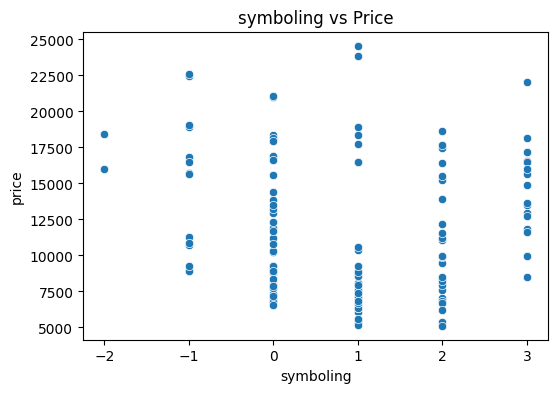

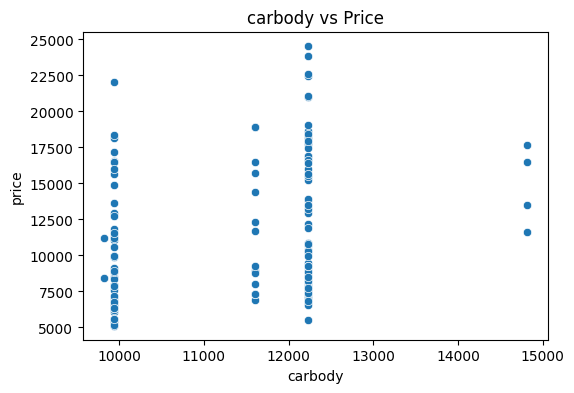

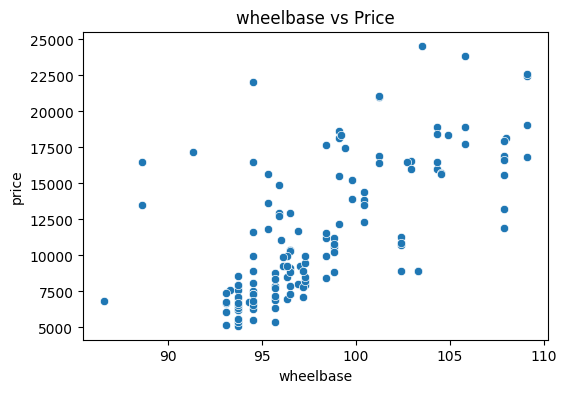

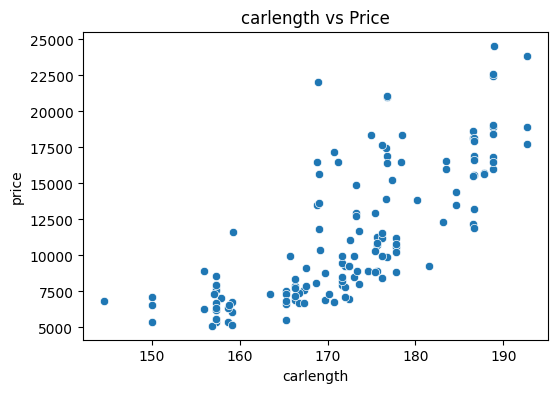

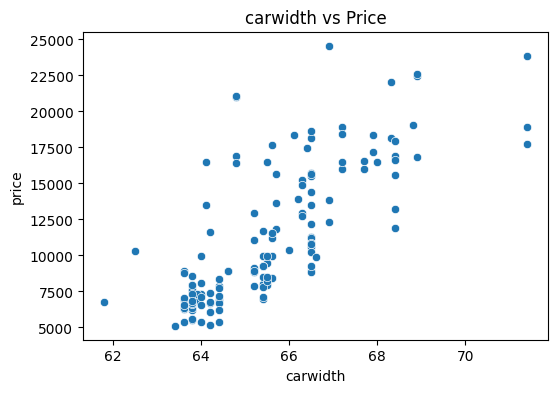

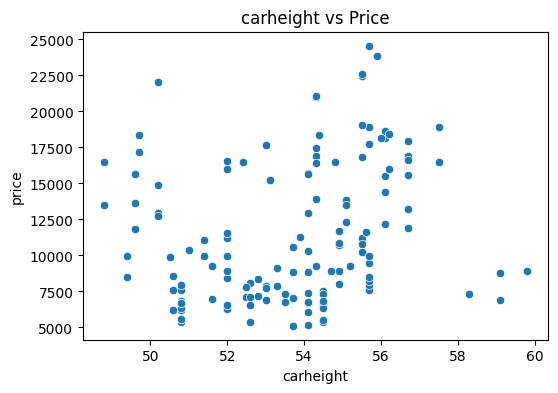

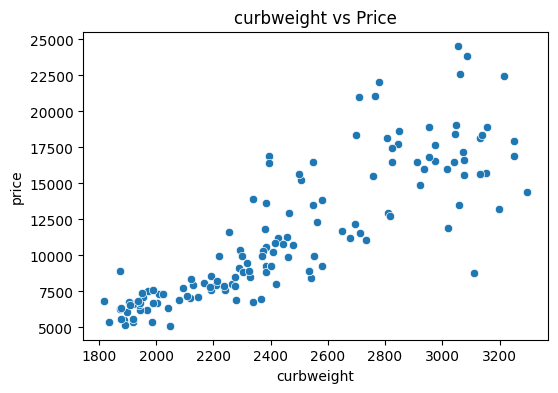

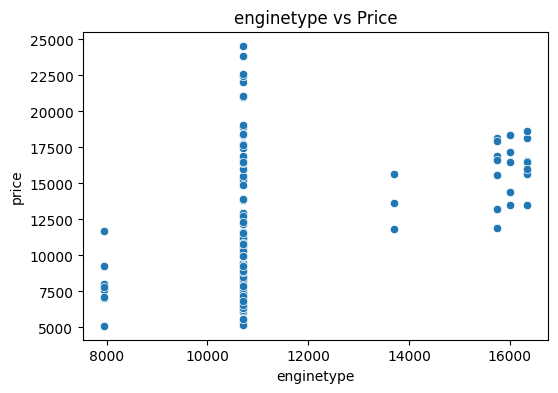

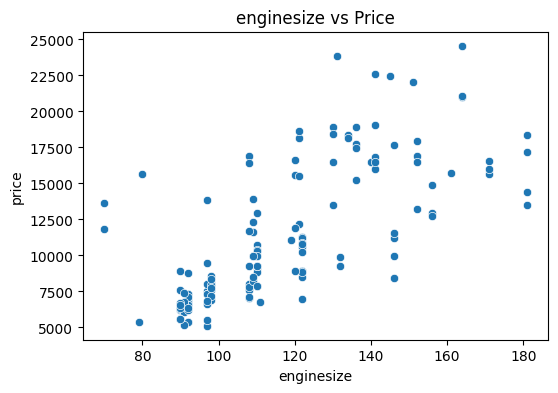

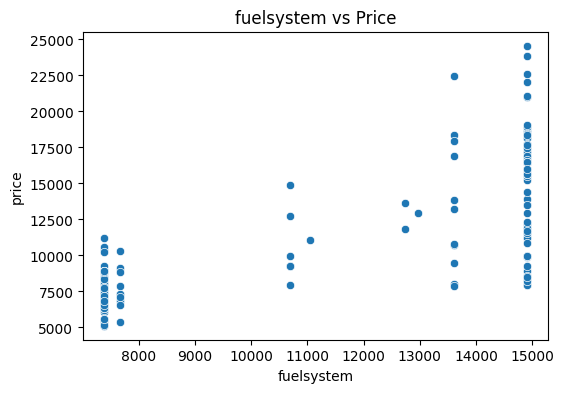

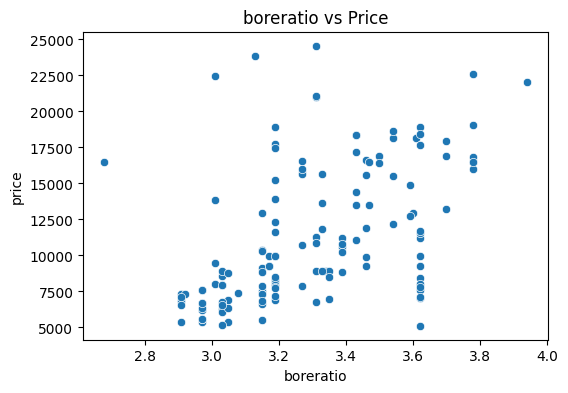

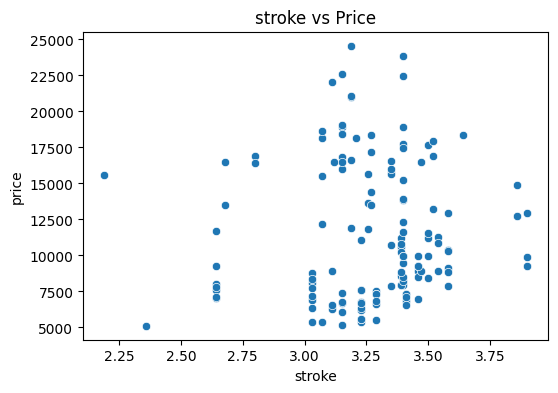

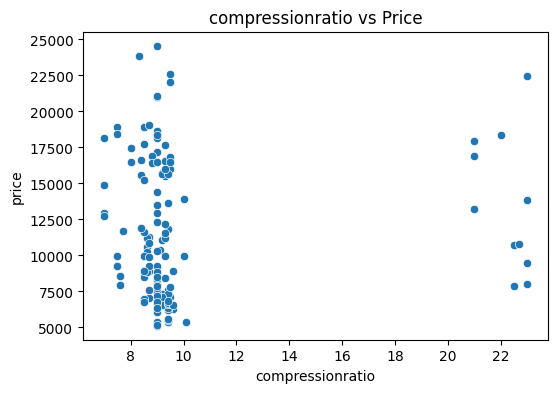

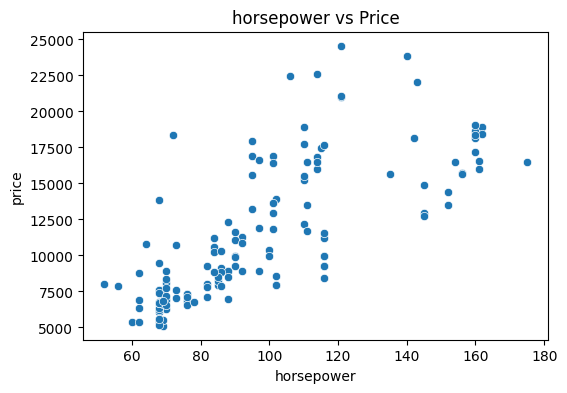

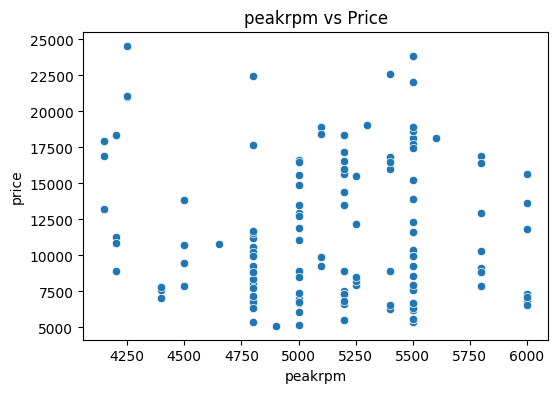

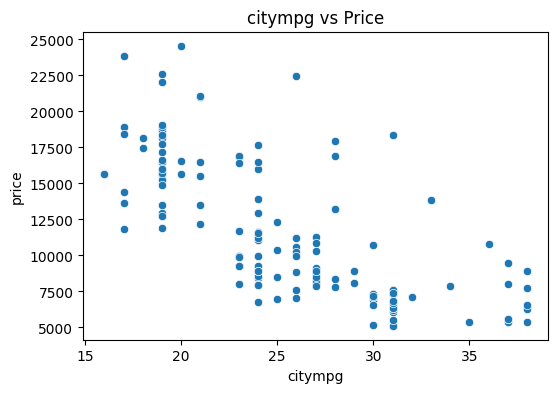

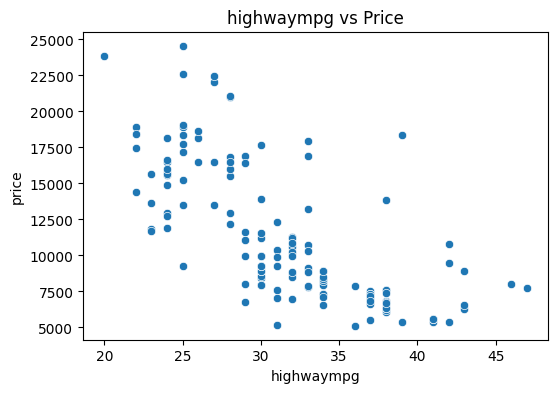

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = clean_df.select_dtypes(include='number').columns.tolist()
numerical_cols.remove('price')  # exclude target

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=clean_df[col], y=clean_df['price'])
    plt.title(f'{col} vs Price')
    plt.show()


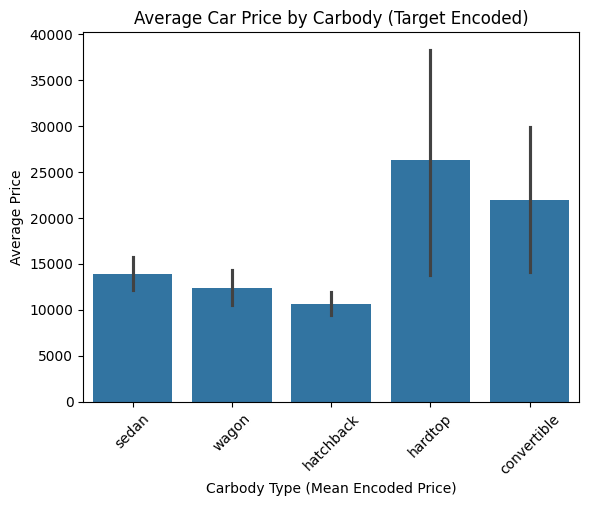

In [33]:
# Show the relationship between carbody and price
sns.barplot(x='carbody', y='price', data=df)
plt.title('Average Car Price by Carbody (Target Encoded)')
plt.xlabel('Carbody Type (Mean Encoded Price)')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()



Car with Hardtop are costliest followed by convertible cars

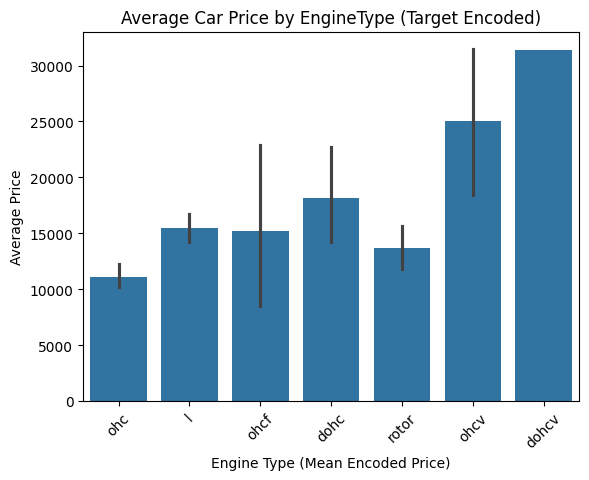

In [34]:
# Show the relationship between carbody and price
sns.barplot(x='enginetype', y='price', data=df)
plt.title('Average Car Price by EngineType (Target Encoded)')
plt.xlabel('Engine Type (Mean Encoded Price)')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


We see dohcv have the highest average price followed by ohcv while the other engine types have somewhat simiar pricing

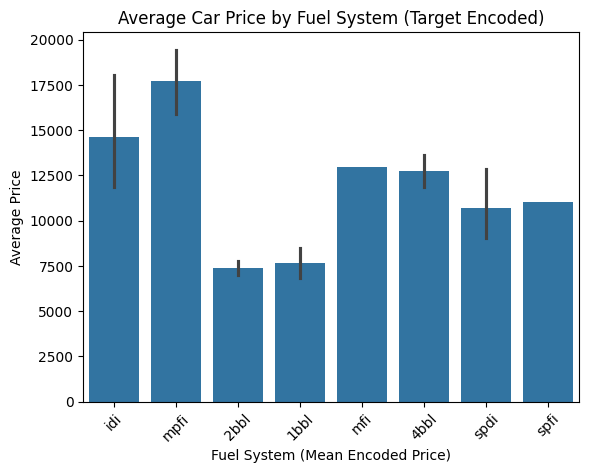

In [35]:
# Show the relationship between carbody and price
sns.barplot(x='fuelsystem', y='price', data=df)
plt.title('Average Car Price by Fuel System (Target Encoded)')
plt.xlabel('Fuel System (Mean Encoded Price)')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

mpfi has the highest price in the fuel system followed by idi whereas the other types are evenly distributed

In [36]:
# List all numerical columns in the dataframe excluding 'price' and target-encoded columns
numerical_cols = clean_df.select_dtypes(include='number').columns.tolist()

# Remove target-encoded columns
numerical_cols = [col for col in numerical_cols if col not in ['price', 'carbody', 'enginetype', 'fuelsystem']]

print(numerical_cols)


['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


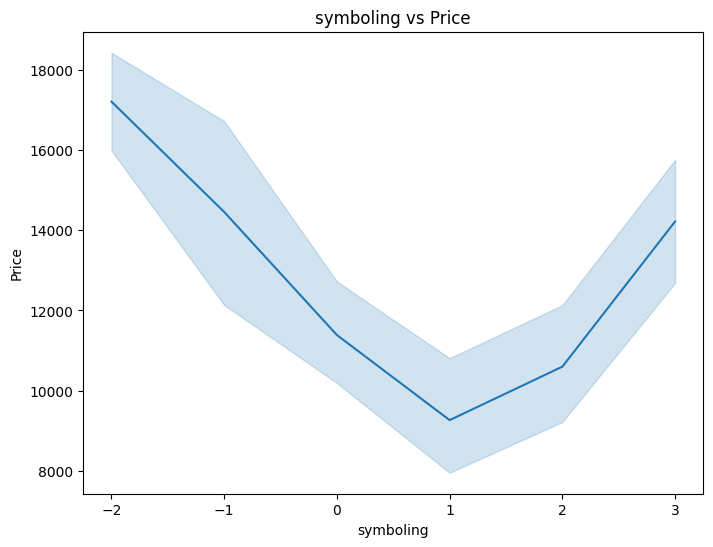

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'column_name' with the feature you want to plot (e.g., 'horsepower')
column_name = 'symboling'  # Example

# Plot a line chart for the selected numerical feature
plt.figure(figsize=(8, 6))
sns.lineplot(x=clean_df[column_name], y=clean_df['price'])
plt.title(f'{column_name} vs Price')
plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()



Price of Cars decreases initially inidcating that the cars with higher risks are cheaper but then it increases again indicating that some high end cars are expensive

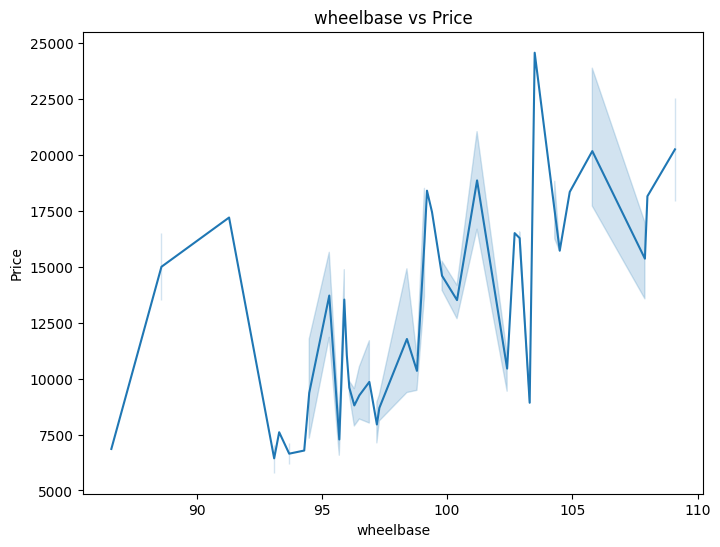

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'column_name' with the feature you want to plot (e.g., 'horsepower')
column_name = 'wheelbase'  # Example
#'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
# Plot a line chart for the selected numerical feature
plt.figure(figsize=(8, 6))
sns.lineplot(x=clean_df[column_name], y=clean_df['price'])
plt.title(f'{column_name} vs Price')
plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()



The chart is skewed but it does suggest that cars with larger wheel base tend to be costlier

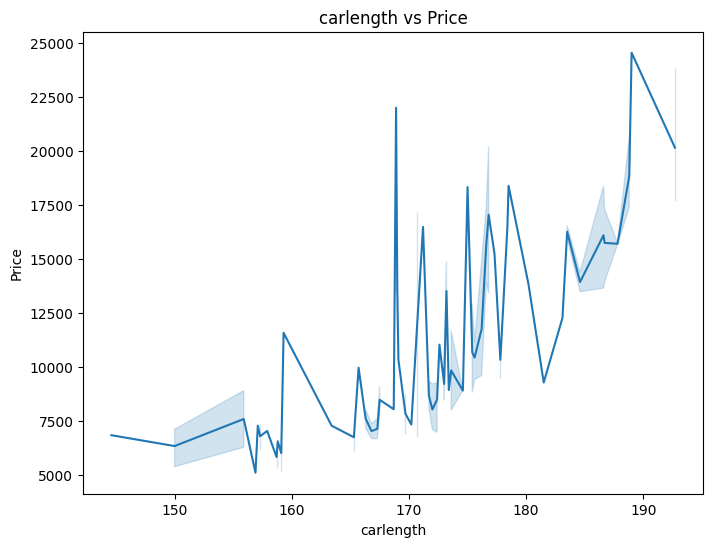

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'column_name' with the feature you want to plot (e.g., 'horsepower')
column_name = 'carlength'  # Example
# 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
# Plot a line chart for the selected numerical feature
plt.figure(figsize=(8, 6))
sns.lineplot(x=clean_df[column_name], y=clean_df['price'])
plt.title(f'{column_name} vs Price')
plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()

There is a clear relation suggesting that as the car length increases price of car increases as well showing strong relation

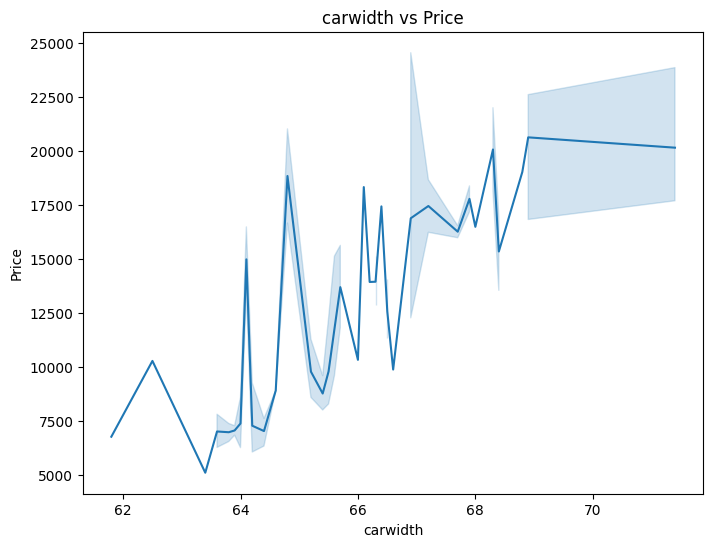

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'column_name' with the feature you want to plot (e.g., 'horsepower')
column_name = 'carwidth'  # Example
# 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
# Plot a line chart for the selected numerical feature
plt.figure(figsize=(8, 6))
sns.lineplot(x=clean_df[column_name], y=clean_df['price'])
plt.title(f'{column_name} vs Price')
plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()

Like we saw in car length carwidth also has relation with price

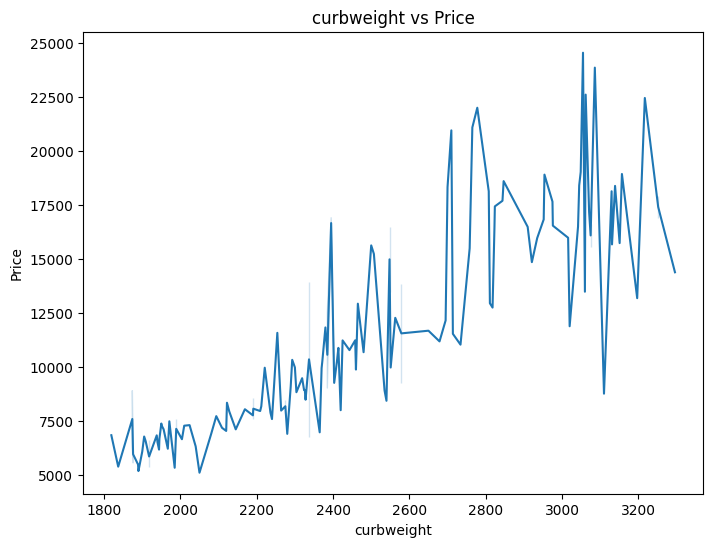

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'column_name' with the feature you want to plot (e.g., 'horsepower')
column_name = 'curbweight'  # Example
# 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
# Plot a line chart for the selected numerical feature
plt.figure(figsize=(8, 6))
sns.lineplot(x=clean_df[column_name], y=clean_df['price'])
plt.title(f'{column_name} vs Price')
plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()

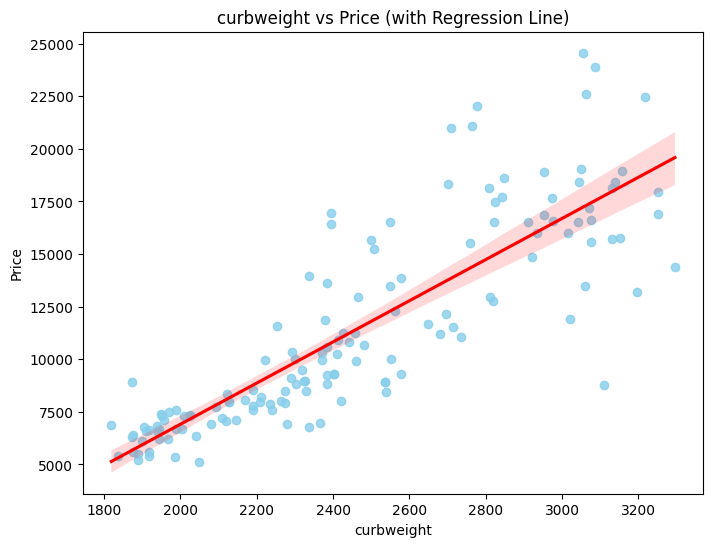

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'column_name' with the feature you want to plot
column_name = 'curbweight'  # Example

plt.figure(figsize=(8, 6))
sns.regplot(x=clean_df[column_name], y=clean_df['price'], scatter_kws={"color": "skyblue"}, line_kws={"color": "red"})
plt.title(f'{column_name} vs Price (with Regression Line)')
plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()


the regression line shows strong positive relation of curbweight showing a positive correlation in predicting price

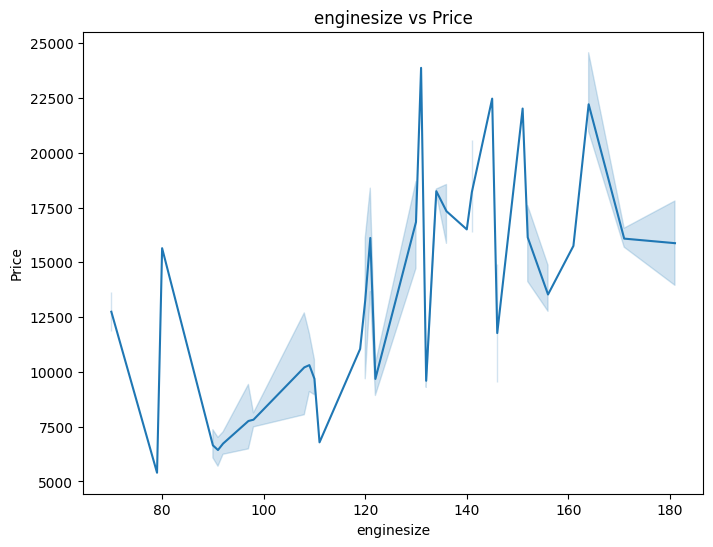

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'column_name' with the feature you want to plot (e.g., 'horsepower')
column_name = 'enginesize'  # Example
#  'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
# Plot a line chart for the selected numerical feature
plt.figure(figsize=(8, 6))
sns.lineplot(x=clean_df[column_name], y=clean_df['price'])
plt.title(f'{column_name} vs Price')
plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()

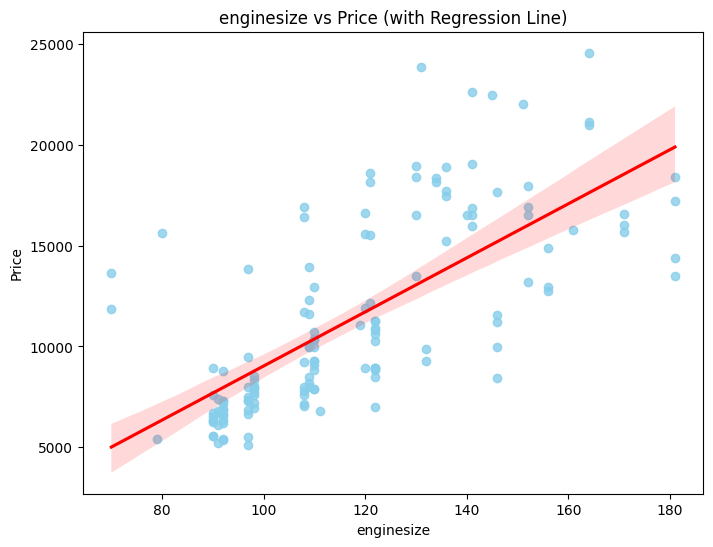

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the column to plot
column_name = 'enginesize'  # Example
#  'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

# Plot scatter with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=clean_df[column_name], y=clean_df['price'], scatter_kws={"color": "skyblue"}, line_kws={"color": "red"})
plt.title(f'{column_name} vs Price (with Regression Line)')
plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()


It shows a moderate positive relationship, the upward going regression line indicated that price tends to increase as the engine size increases but the wide spead tells us that engine size isnt the only factor that affects the price

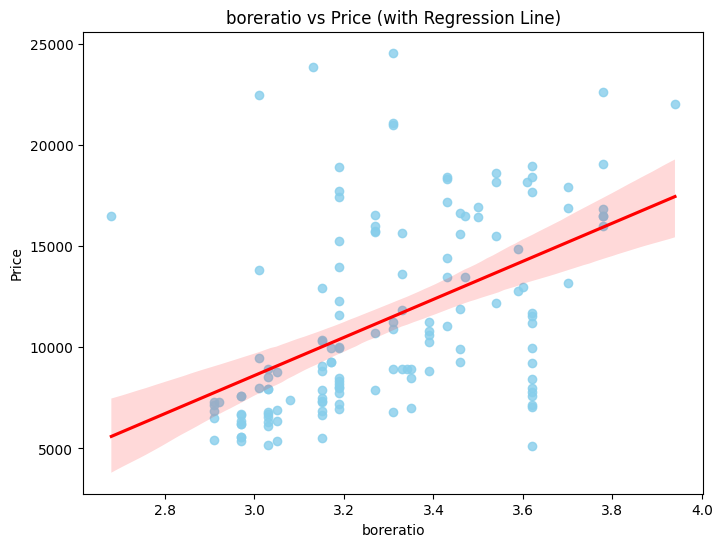

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the column to plot
column_name = 'boreratio'  # Example
#  '', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

# Plot scatter with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=clean_df[column_name], y=clean_df['price'], scatter_kws={"color": "skyblue"}, line_kws={"color": "red"})
plt.title(f'{column_name} vs Price (with Regression Line)')
plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()


It shows a moderate positive relationship, the upward going regression line indicated that price tends to increase as the boreratio increases but the wide spead tells us that engine size isnt the only factor that affects the price

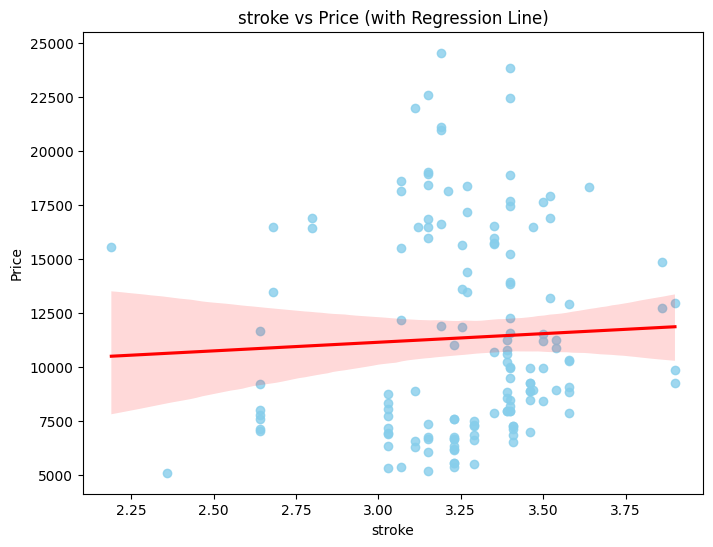

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the column to plot
column_name = 'stroke'  # Example
# 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

# Plot scatter with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=clean_df[column_name], y=clean_df['price'], scatter_kws={"color": "skyblue"}, line_kws={"color": "red"})
plt.title(f'{column_name} vs Price (with Regression Line)')
plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()


It shows a weak relation as the regression line doesnt seems to increase rather its flat, indicating stroke doesn't have influence on price

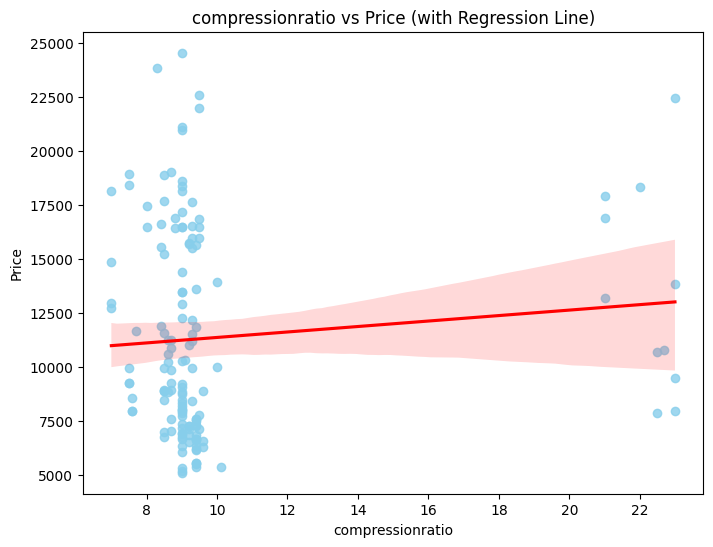

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the column to plot
column_name = 'compressionratio'  # Example
# 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

# Plot scatter with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=clean_df[column_name], y=clean_df['price'], scatter_kws={"color": "skyblue"}, line_kws={"color": "red"})
plt.title(f'{column_name} vs Price (with Regression Line)')
plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()


Compression Ratio has very weak correlation with price as suggested by the chart the wide spread prices suggest there are other factors influencing the price

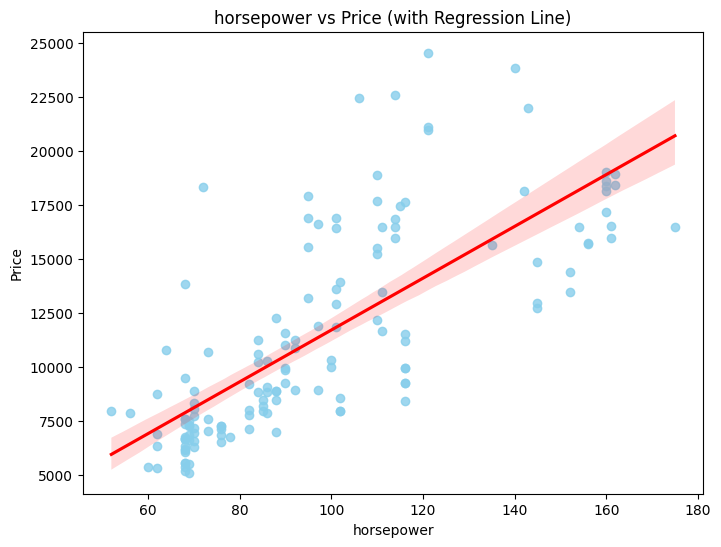

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the column to plot
column_name = 'horsepower'  # Example
# 'peakrpm', 'citympg', 'highwaympg']

# Plot scatter with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=clean_df[column_name], y=clean_df['price'], scatter_kws={"color": "skyblue"}, line_kws={"color": "red"})
plt.title(f'{column_name} vs Price (with Regression Line)')
plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()

The regression line has a strong positive slope indicating the strong correlation of horsepower with price also most of the points lie around the regression line indicating horsepower is an important

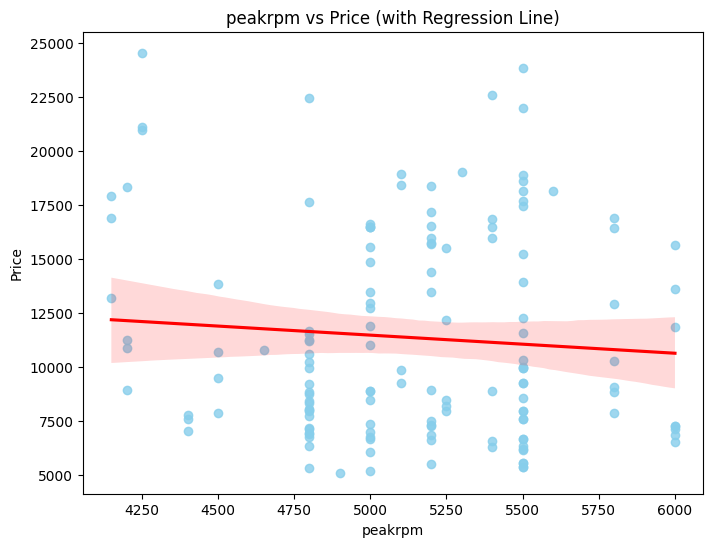

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the column to plot
column_name = 'peakrpm'  # Example
# 'citympg', 'highwaympg']

# Plot scatter with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=clean_df[column_name], y=clean_df['price'], scatter_kws={"color": "skyblue"}, line_kws={"color": "red"})
plt.title(f'{column_name} vs Price (with Regression Line)')
plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()

As the regression line is not increasing we interpret that peakrpm doesnt have strong relationship with price

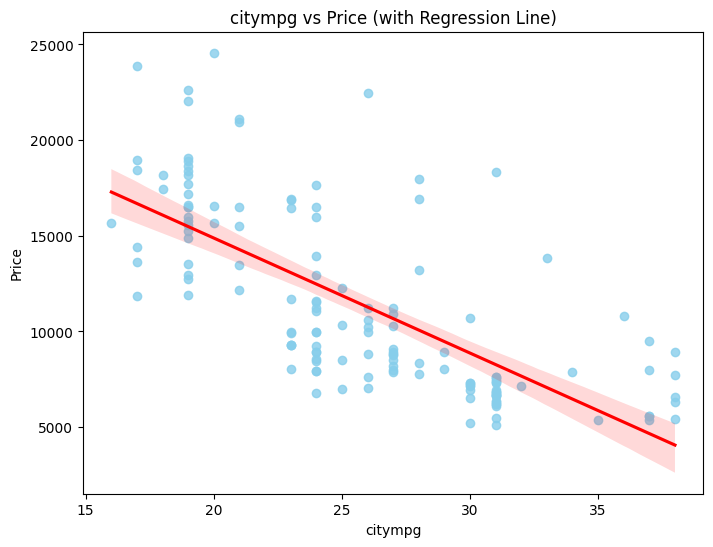

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the column to plot
column_name = 'citympg'  # Example
# 'highwaympg']

# Plot scatter with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=clean_df[column_name], y=clean_df['price'], scatter_kws={"color": "skyblue"}, line_kws={"color": "red"})
plt.title(f'{column_name} vs Price (with Regression Line)')
plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()

The regression line decreases showing that as the citympg increases price of the car decreases

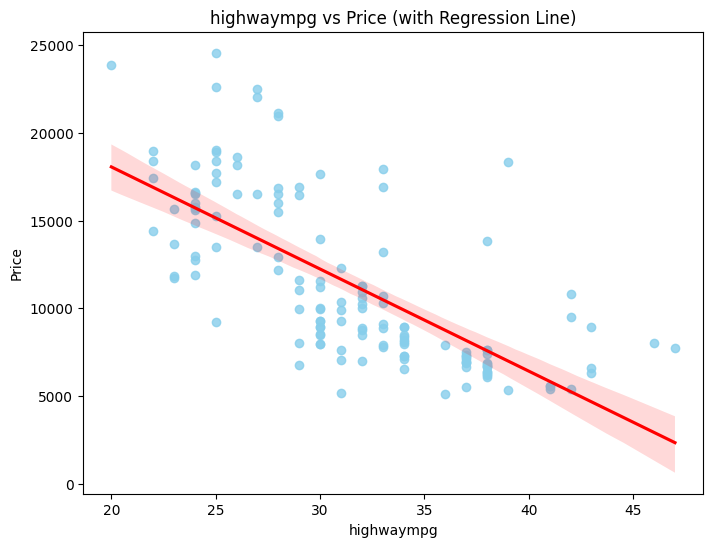

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the column to plot
column_name = 'highwaympg'

# Plot scatter with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=clean_df[column_name], y=clean_df['price'], scatter_kws={"color": "skyblue"}, line_kws={"color": "red"})
plt.title(f'{column_name} vs Price (with Regression Line)')
plt.xlabel(column_name)
plt.ylabel('Price')
plt.show()

The regression line decreases showing that as the citympg increases price of the car decreases

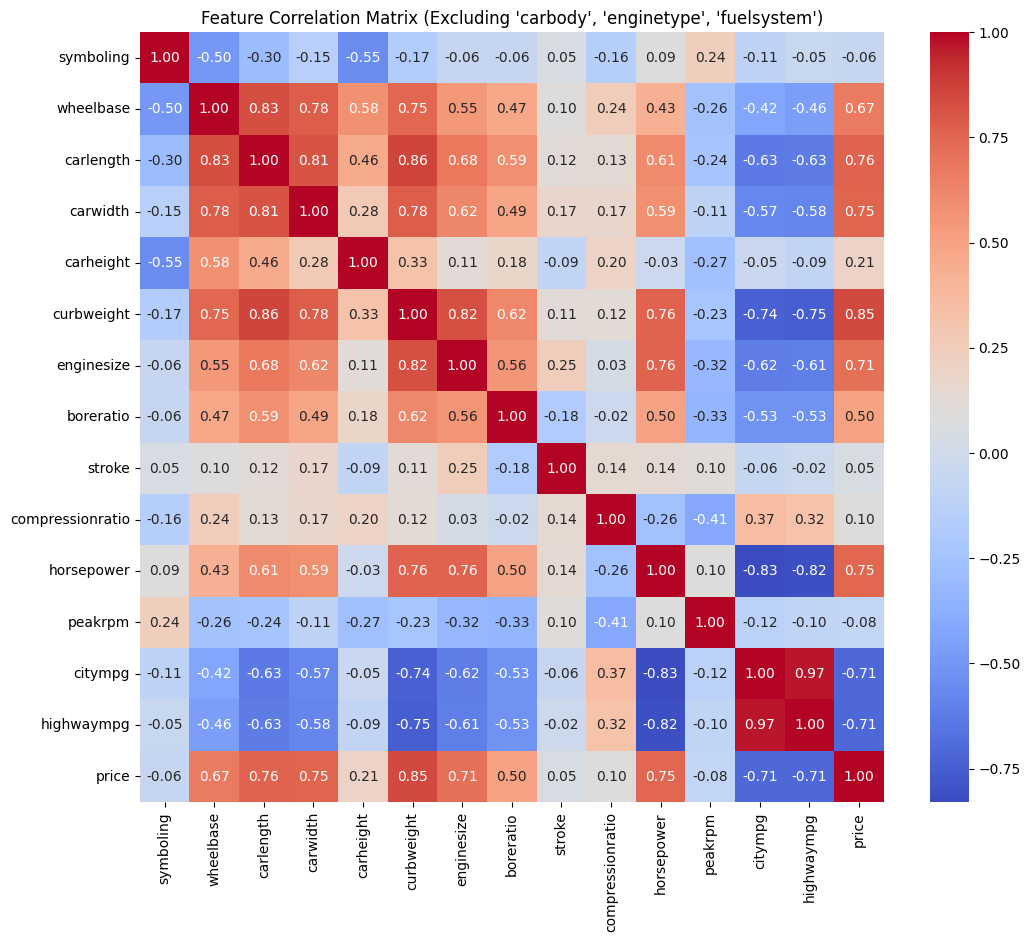

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = clean_df

# Drop specified columns
excluded_columns = ['carbody', 'enginetype', 'fuelsystem']
df_filtered = df.drop(columns=excluded_columns)

# Select only numerical columns
df_numerical = df_filtered.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = df_numerical.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix (Excluding 'carbody', 'enginetype', 'fuelsystem')")
plt.show()


Analyzing the above correlation matrix, we infer that:

1. **Symboling** - shows no positive correlation with price, indicating it doesn't participate much in determining the price.

2. **Wheelbase** - shows a medium positive correlation with price (0.67), meaning there is a moderate connection between the wheelbase length and the vehicle price, although it is not a very strong determinant by itself.

3. **Carlength** - shows a high positive correlation with price (0.76) and has a strong influence on determining the price of the vehicle. Apart from this, it has high correlations with wheelbase (0.83), carwidth (0.78), and curbweight (0.88).

4. **Carwidth** - shows a high positive correlation with price (0.75) and a strong relationship with carlength (0.78), curbweight (0.77), and enginesize (0.63), indicating it plays a key role in determining the overall size and price of the car.

5. **Carheight** - shows a weak negative correlation with price (-0.17), indicating that it has minimal influence on the car’s price compared to other factors.

6. **Curbweight** - shows a high positive correlation with price (0.76) and is strongly correlated with carlength (0.88), carwidth (0.77), and enginesize (0.68). This suggests that heavier cars tend to have a higher price.

7. **Enginesize** - shows a very strong positive correlation with price (0.75), indicating that the engine size plays a significant role in determining the price. It also has high correlations with horsepower (0.87) and curbweight (0.68).

8. **Bore** - shows a moderate positive correlation with stroke (0.60) and enginesize (0.69), indicating that it is somewhat related to the engine characteristics and indirectly affects the price.

9. **Stroke** - shows a moderate positive correlation with bore (0.60) and a negative correlation with price (-0.56), suggesting that while stroke might affect the engine, it is not as important in determining price.

10. **Compressionratio** - shows weak correlations with most features but has a moderate negative correlation with horsepower (-0.63), suggesting that vehicles with lower compression ratios tend to have higher horsepower and could potentially affect pricing.

11. **Horsepower** - shows a strong positive correlation with enginesize (0.87) and moderate negative correlation with price (-0.71), indicating that vehicles with higher horsepower tend to have lower prices in this dataset, possibly due to other factors like engine efficiency.

12. **Peakrpm** - shows a moderate negative correlation with horsepower (-0.27) and enginesize (-0.27), indicating that higher peak rpm does not strongly affect horsepower or engine size but might be indirectly related to vehicle performance and pricing.

13. **Citympg** - shows a strong negative correlation with price (-0.71), suggesting that cars with higher fuel efficiency in city driving tend to have lower prices.

14. **Highwaympg** - shows a strong negative correlation with price (-0.71), similar to citympg, indicating that vehicles with better fuel efficiency on highways tend to have lower prices.

15. **Price** - is most strongly correlated with carlength (0.76), wheelbase (0.67), curbweight (0.76), and enginesize (0.75). These factors play a significant role in determining the price of the vehicle, with larger and more powerful vehicles generally having higher prices.

This analysis of the correlation matrix helps us understand the relationships between various features and the vehicle price, providing insight into which factors are most influential in pricing.

**Feature Selection**

Using Select K Best Features Algo

In [53]:
from sklearn.feature_selection import SelectKBest, f_regression  # Use f_classif for classification
import pandas as pd

# Define target variable
target_column = "price"  # Change to your actual target column
X = clean_df.drop(columns=[target_column])  # Features
y = clean_df[target_column]  # Target variable

# Apply SelectKBest for feature selection
k = 10  # Select top 10 best features
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

print("Selected Features:", selected_features)

# Create a new DataFrame with selected features
X_filtered = pd.DataFrame(X_selected, columns=selected_features)

# Create DataFrame to display scores and p-values
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_, 'P-Value': selector.pvalues_})
feature_scores = feature_scores.sort_values(by="Score", ascending=False)  # Sort by score
feature_scores['Ranking'] = range(1, len(feature_scores) + 1)
# Print feature scores
print("📊 Feature Rankings using SelectKBest:")
print(feature_scores)


Selected Features: Index(['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'fuelsystem', 'horsepower', 'citympg', 'highwaympg'],
      dtype='object')
📊 Feature Rankings using SelectKBest:
             Feature       Score       P-Value  Ranking
11        curbweight  359.197248  1.342043e-40        1
8          carlength  190.116661  6.398838e-28        2
9           carwidth  181.834539  3.852528e-27        3
19        horsepower  181.042352  4.585368e-27        4
15        fuelsystem  172.404605  3.150703e-26        5
21           citympg  147.041355  1.253382e-23        6
22        highwaympg  144.950090  2.102208e-23        7
14        enginesize  142.849007  3.548169e-23        8
7          wheelbase  115.087831  5.310335e-20        9
5         drivewheel   71.499474  3.151433e-14       10
16         boreratio   47.161993  1.922315e-10       11
12        enginetype   32.151907  7.772448e-08       12
13    cylindernumber   30.696384  1.434483e-0

The Top 10 Features Given By Select K Best Algorithm are: -

1.   drivewheel
2.   wheelbase
3.   carlength
4.   carwidth
5.   curbweight
6.   enginesize
7.   fuelsystem
8.   horsepower
9.   citympg
10.  highwaympg



Using Recursive Feature Elimination

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

# Define target variable
target_column = "price"  # Change this to your actual target column
X = clean_df.drop(columns=[target_column])  # Features
y = clean_df[target_column]  # Target variable

# Initialize the Linear Regression model
model = LinearRegression()

# Apply RFE for feature selection
k = 10  # Select top 10 features
selector = RFE(model, n_features_to_select=k)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

print("📌 Selected Features:", selected_features)

# Create a new DataFrame with selected features
X_filtered = pd.DataFrame(X_selected, columns=selected_features)

feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': selector.ranking_})
feature_ranking = feature_ranking.sort_values(by="Ranking")
# feature_ranking['Ranking'] = range(1, len(feature_scores) + 1)
print("📊 Feature Ranking in RFE:")
print(feature_ranking)


📌 Selected Features: Index(['fueltype', 'aspiration', 'doornumber', 'drivewheel', 'carwidth',
       'cylindernumber', 'boreratio', 'stroke', 'compressionratio', 'citympg'],
      dtype='object')
📊 Feature Ranking in RFE:
             Feature  Ranking
1           fueltype        1
2         aspiration        1
3         doornumber        1
5         drivewheel        1
13    cylindernumber        1
9           carwidth        1
17            stroke        1
16         boreratio        1
21           citympg        1
18  compressionratio        1
0          symboling        2
7          wheelbase        3
22        highwaympg        4
10         carheight        5
19        horsepower        6
14        enginesize        7
8          carlength        8
11        curbweight        9
4            carbody       10
12        enginetype       11
20           peakrpm       12
15        fuelsystem       13
6     enginelocation       14


Top 10 Features Given by Recursive Feature Elimination are: -

1. fueltype
2. aspiration
3. doornumber
4. drivewheel
5. carwidth
6. cylindernumber
7. boreratio
8. stroke
9. compressionratio
10. citympg


Using Lasso Regression to get top  features

In [55]:
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd

# Initialize and fit Lasso model
lasso = Lasso(alpha=0.1)  # Adjust alpha for stronger/weaker regularization
lasso.fit(X, y)

# Create DataFrame with feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(lasso.coef_)  # Take absolute value of coefficients
})

# Sort by importance in descending order
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Add ranking column
feature_importance['Ranking'] = range(1, len(feature_importance) + 1)

# Print feature rankings
print("📊 Feature Rankings using Lasso (Embedded Method):")
print(feature_importance)


📊 Feature Rankings using Lasso (Embedded Method):
             Feature   Importance  Ranking
1           fueltype  8279.418662        1
16         boreratio  1901.481921        2
17            stroke  1733.770054        3
5         drivewheel  1647.073572        4
13    cylindernumber   850.405142        5
18  compressionratio   784.909123        6
2         aspiration   770.176384        7
9           carwidth   535.516192        8
21           citympg   431.089781        9
3         doornumber   371.728639       10
22        highwaympg   239.672955       11
0          symboling   214.496793       12
7          wheelbase   123.387481       13
8          carlength    45.652123       14
19        horsepower    32.917811       15
10         carheight    18.896726       16
14        enginesize    11.918421       17
11        curbweight     4.756208       18
4            carbody     0.593816       19
20           peakrpm     0.470200       20
12        enginetype     0.462544       21
15  

c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.393e+07, tolerance: 3.220e+05
  model = cd_fast.enet_coordinate_descent(


Top 10 Features Given by Lasso Regression are: -

1. fueltype
2. boreratio
3. stroke
4. drivewheel
5. cylindernumber
6. compressionratio
7. aspiration
8. carwidth
9. citympg
10. doornumber

Using Random Forest Regressor to find top 10 Features

In [56]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Create DataFrame with feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_  # Get feature importance scores
})

# Sort by importance
feature_importance_rf = feature_importance_rf.sort_values(by="Importance", ascending=False)

# Add ranking column
feature_importance_rf['Ranking'] = range(1, len(feature_importance_rf) + 1)

# Print feature rankings
print("📊 Feature Rankings using Random Forest (Embedded Method):")
print(feature_importance_rf)


📊 Feature Rankings using Random Forest (Embedded Method):
             Feature  Importance  Ranking
11        curbweight    0.568379        1
22        highwaympg    0.107994        2
19        horsepower    0.093742        3
8          carlength    0.029850        4
7          wheelbase    0.029421        5
14        enginesize    0.029295        6
9           carwidth    0.026492        7
15        fuelsystem    0.024430        8
20           peakrpm    0.015270        9
21           citympg    0.014640       10
17            stroke    0.010760       11
5         drivewheel    0.010473       12
16         boreratio    0.007879       13
18  compressionratio    0.007464       14
12        enginetype    0.006134       15
10         carheight    0.005352       16
4            carbody    0.005267       17
0          symboling    0.002445       18
13    cylindernumber    0.001720       19
2         aspiration    0.001631       20
3         doornumber    0.001274       21
1           fuelty

Top 10 Features Given By Random Forest Regressor are :-

1. curbweight
2. highwaympg
3. horsepower
4. carlength
5. wheelbase
6. enginesize
7. carwidth
8. fuelsystem
9. peakrpm
10. citympg


**Fitting the top 10 Features in Linear Regression Model**

Evaluation Metric Code

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def evaluate_regression_model(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Metrics
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # Percentage Errors
    mae_percent = (mae / np.mean(y_true)) * 100
    rmse_percent = (rmse / np.mean(y_true)) * 100
    loss = (1 - r2) * 100

    # Print
    print("📊 Model Evaluation:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f} ({mae_percent:.2f}%)")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f} ({rmse_percent:.2f}%)")
    # print(f"Loss (1 - R²): {loss:.2f}%")

    return {
        "r2": r2,
        "mae": mae,
        "rmse": rmse,
        "mae_percent": mae_percent,
        "rmse_percent": rmse_percent,
        "loss_percent": loss
    }


Linear Regression Model

In [58]:
# FITTING THE FEATURES ACCORDING TO FILTERING METHOD

from sklearn.model_selection import train_test_split
selected_features =  [ "enginesize",
    "curbweight",
    "highwaympg",
    "horsepower",
    "carwidth",
    "carlength",
    "wheelbase",
    "citympg",
    "peakrpm",
    "stroke"]  # List of required features
X = clean_df[selected_features]  # Select only these columns
# X = car_data.drop(columns=['price'])  # Features
y = clean_df['price']  # Target
# Split data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

train_metrics = evaluate_regression_model(y_train, model.predict(X_train))
test_metrics = evaluate_regression_model(y_test, model.predict(X_test))
print("\nComparison:")
print(f"Train R²: {train_metrics['r2']:.4f} | Test R²: {test_metrics['r2']:.4f}")
print(f"Train MAE: {train_metrics['mae']:.2f} | Test MAE: {test_metrics['mae']:.2f}")
print(f"Train RMSE: {train_metrics['rmse']:.2f} | Test RMSE: {test_metrics['rmse']:.2f}")

📊 Model Evaluation:
R² Score: 0.7739
Mean Absolute Error (MAE): 1695.60 (14.45%)
Root Mean Squared Error (RMSE): 2338.46 (19.93%)
📊 Model Evaluation:
R² Score: 0.7516
Mean Absolute Error (MAE): 1239.75 (12.46%)
Root Mean Squared Error (RMSE): 1823.44 (18.33%)

Comparison:
Train R²: 0.7739 | Test R²: 0.7516
Train MAE: 1695.60 | Test MAE: 1239.75
Train RMSE: 2338.46 | Test RMSE: 1823.44


Trying K Fold Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np

# Assume you already have X (features) and y (target)

# Initialize your model
model = LinearRegression()

# Define the number of folds (K)
k = 5  # You can change this value

# Initialize KFold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Apply cross-validation
# The 'scoring' argument can be one of 'neg_mean_absolute_error', 'neg_mean_squared_error', etc.
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert negative MAE to positive and calculate the average
mae_scores = -scores
average_mae = np.mean(mae_scores)

# Print the MAE for each fold and the average MAE
print(f"MAE for each fold: {mae_scores}")
print(f"Average MAE: {average_mae:.2f}")

# Optionally, you can use other metrics like R² or RMSE
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print(f"R² for each fold: {r2_scores}")
print(f"Average R²: {np.mean(r2_scores):.4f}")


MAE for each fold: [1239.75294145 1834.34607459 2044.0955235  1549.37746013 2288.19565056]
Average MAE: 1791.15
R² for each fold: [0.75163981 0.70244811 0.67189244 0.78766659 0.67277981]
Average R²: 0.7173


Applying Gradient Descent on Linear Regression to Minimize Error

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def run_gradient_descent(X_train, y_train, learning_rate=0.01, iterations=1000, plot=True):
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(np.array(X_train))
    # X_train_scaled = np.array(X_train)
    y_train = np.array(y_train)

    m, n = X_train_scaled.shape

    # Initialize parameters
    theta = np.zeros(n)
    bias = 0
    history = []

    # Gradient Descent
    for i in range(iterations):
        y_pred = X_train_scaled.dot(theta) + bias
        error = y_pred - y_train

        gradient_theta = (2 / m) * X_train_scaled.T.dot(error)
        gradient_bias = (2 / m) * np.sum(error)

        theta -= learning_rate * gradient_theta
        bias -= learning_rate * gradient_bias

        cost = (1 / m) * np.sum(error ** 2)
        history.append(cost)

        # if i % 100 == 0:
        #     print(f"LR={learning_rate} | Iteration {i}: Cost = {cost:.4f}")

    # Optional: plot cost convergence
    if plot:
        plt.plot(range(iterations), history)
        plt.xlabel("Iterations")
        plt.ylabel("Cost (MSE)")
        plt.title(f"Gradient Descent Convergence (LR={learning_rate})")
        plt.grid(True)
        plt.show()

    # Predictions & evaluation
    y_pred_train = X_train_scaled.dot(theta) + bias
    metrics = evaluate_regression_model(y_train, y_pred_train)

    return {
        "theta": theta,
        "bias": bias,
        "history": history,
        "metrics": metrics,
        "y_pred_train": y_pred_train
    }


Using GridSearch


Testing learning rate: 0.001


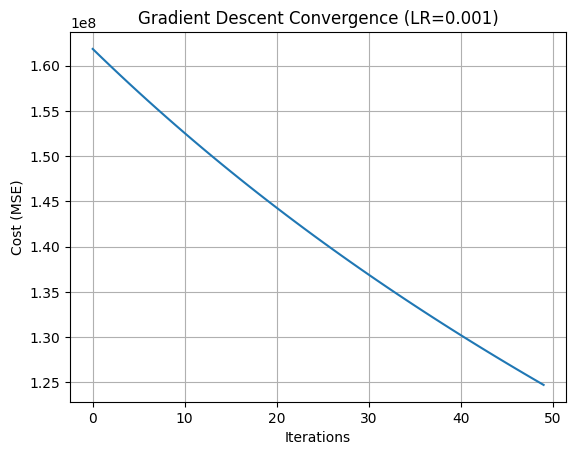

📊 Model Evaluation:
R² Score: -4.1317
Mean Absolute Error (MAE): 10615.04 (90.47%)
Root Mean Squared Error (RMSE): 11141.53 (94.96%)

Testing learning rate: 0.01


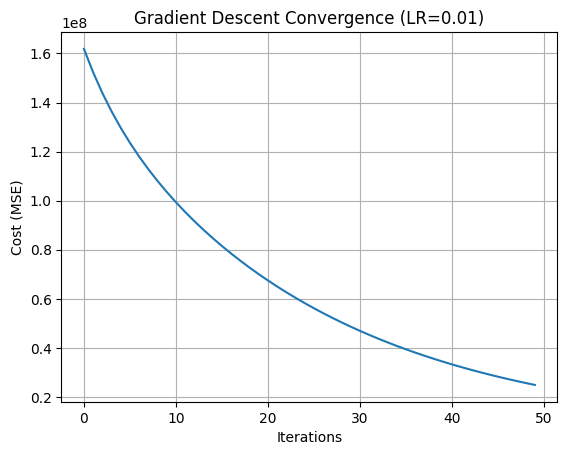

📊 Model Evaluation:
R² Score: 0.0021
Mean Absolute Error (MAE): 4290.16 (36.57%)
Root Mean Squared Error (RMSE): 4913.07 (41.88%)

Testing learning rate: 0.05


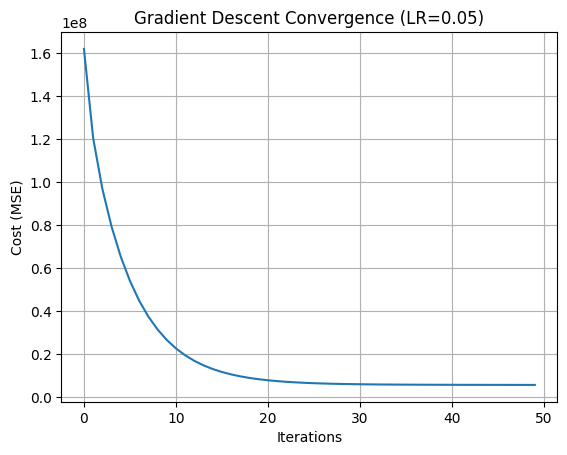

📊 Model Evaluation:
R² Score: 0.7665
Mean Absolute Error (MAE): 1715.83 (14.62%)
Root Mean Squared Error (RMSE): 2376.74 (20.26%)

Testing learning rate: 0.08


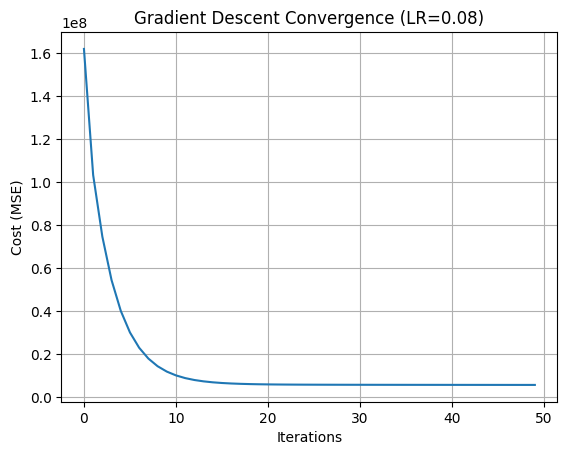

📊 Model Evaluation:
R² Score: 0.7689
Mean Absolute Error (MAE): 1712.10 (14.59%)
Root Mean Squared Error (RMSE): 2364.15 (20.15%)

Testing learning rate: 0.1


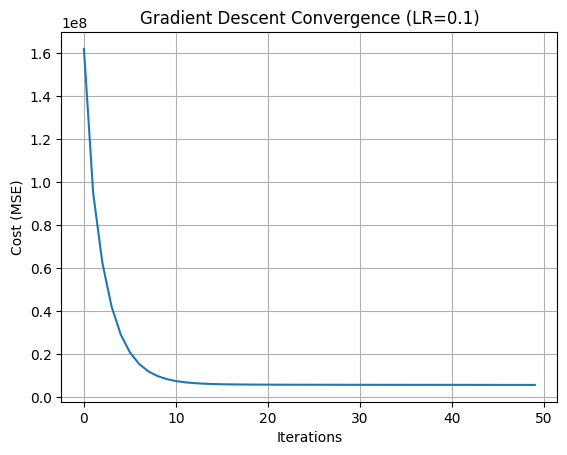

📊 Model Evaluation:
R² Score: 0.7699
Mean Absolute Error (MAE): 1707.84 (14.56%)
Root Mean Squared Error (RMSE): 2359.37 (20.11%)


In [61]:
for lr in [0.001, 0.01, 0.05, 0.08, 0.1]:
    print(f"\nTesting learning rate: {lr}")
    run_gradient_descent(X_train, y_train, learning_rate=lr, iterations=50, plot=True)

Trying SGD Regressor

In [62]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Example function to apply SGDRegressor
def apply_sgd_regressor(X_train, y_train, X_test, y_test, learning_rate=0.01, max_iter=1000):
    # Standardizing the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the SGDRegressor with parameters
    sgd_reg = SGDRegressor(learning_rate='constant', eta0=learning_rate, max_iter=max_iter, random_state=42)

    # Fit the model
    sgd_reg.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_train = sgd_reg.predict(X_train_scaled)
    y_pred_test = sgd_reg.predict(X_test_scaled)

    # Evaluate model on training and testing data
    # print("\nTraining Metrics:")
    evaluate_regression_model(y_train, y_pred_train)

    # print("\nTesting Metrics:")
    evaluate_regression_model(y_test, y_pred_test)

    # Return the model and predictions
    return sgd_reg, y_pred_train, y_pred_test


Aplying Grid Search on SGD Regressor

In [63]:
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
max_iters = [50, 100, 150]

results = []

for lr in learning_rates:
    for iters in max_iters:
        # print(f"\n🔍 Testing learning_rate={lr}, max_iter={iters}")
        model, y_train_pred, y_test_pred = apply_sgd_regressor(
            X_train, y_train, X_test, y_test,
            learning_rate=lr,
            max_iter=iters
        )

        metrics_train = evaluate_regression_model(y_train, y_train_pred)
        metrics_test = evaluate_regression_model(y_test, y_test_pred)

        results.append({
            "learning_rate": lr,
            "max_iter": iters,
            "train_r2": metrics_train["r2"],
            "test_r2": metrics_test["r2"],
            "test_mae": metrics_test["mae"],
            "test_rmse": metrics_test["rmse"],
            "test_mae_percent": metrics_test["mae_percent"],
            "test_rmse_percent": metrics_test["rmse_percent"],
            "test_loss_percent": metrics_test["loss_percent"]
        })

# Sort results by test R² descending (or any metric you care about)
sorted_results = sorted(results, key=lambda x: x["test_r2"], reverse=True)

# Print best config
print("\n🔝 Best Configurations:")
for res in sorted_results[:3]:  # Show top 3
    print(res)


📊 Model Evaluation:
R² Score: 0.7673
Mean Absolute Error (MAE): 1717.90 (14.64%)
Root Mean Squared Error (RMSE): 2372.77 (20.22%)
📊 Model Evaluation:
R² Score: 0.7442
Mean Absolute Error (MAE): 1282.28 (12.89%)
Root Mean Squared Error (RMSE): 1850.64 (18.60%)
📊 Model Evaluation:
R² Score: 0.7673
Mean Absolute Error (MAE): 1717.90 (14.64%)
Root Mean Squared Error (RMSE): 2372.77 (20.22%)
📊 Model Evaluation:
R² Score: 0.7442
Mean Absolute Error (MAE): 1282.28 (12.89%)
Root Mean Squared Error (RMSE): 1850.64 (18.60%)
📊 Model Evaluation:
R² Score: 0.7702
Mean Absolute Error (MAE): 1706.22 (14.54%)
Root Mean Squared Error (RMSE): 2357.76 (20.10%)
📊 Model Evaluation:
R² Score: 0.7501
Mean Absolute Error (MAE): 1253.69 (12.60%)
Root Mean Squared Error (RMSE): 1829.06 (18.39%)
📊 Model Evaluation:
R² Score: 0.7702
Mean Absolute Error (MAE): 1706.22 (14.54%)
Root Mean Squared Error (RMSE): 2357.76 (20.10%)
📊 Model Evaluation:
R² Score: 0.7501
Mean Absolute Error (MAE): 1253.69 (12.60%)
Root Mean

c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


MSE Error Graph

c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Co

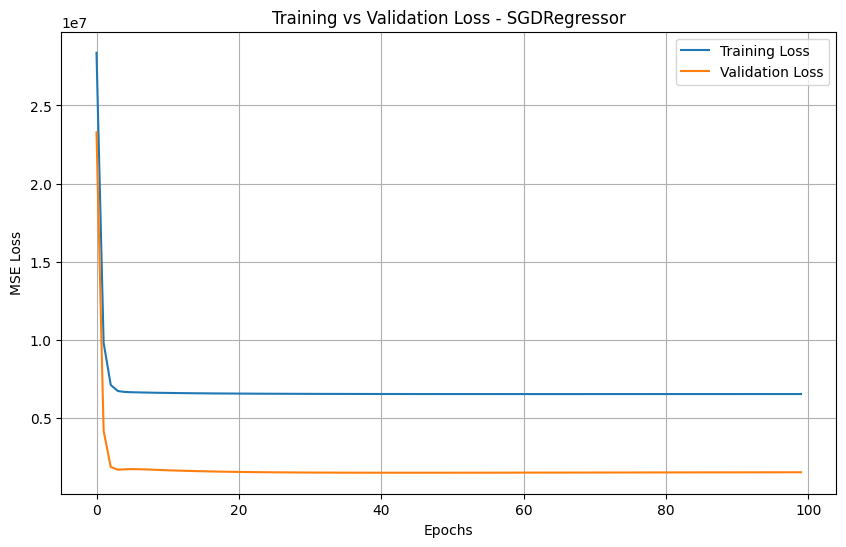

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Sample split of your training set into training and validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)

# Initialize model
model = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1, warm_start=True, random_state=42)

n_epochs = 100
train_losses = []
val_losses = []

for epoch in range(n_epochs):
    model.fit(X_train_scaled, y_train_split)

    # Predict and compute losses
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)

    train_loss = mean_squared_error(y_train_split, y_train_pred)
    val_loss = mean_squared_error(y_val_split, y_val_pred)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), train_losses, label="Training Loss")
plt.plot(range(n_epochs), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss - SGDRegressor")
plt.legend()
plt.grid(True)
plt.show()


Trying Lasso, Random Forest Regressor and SVR

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Define selected features
selected_features = [
    "enginesize", "curbweight", "highwaympg", "horsepower", "carwidth",
    "carlength", "wheelbase", "citympg", "peakrpm", "stroke"
]

# Select features and target
X = clean_df[selected_features]
y = clean_df['price']

# Split data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lasso = Lasso(alpha=0.1)  # L1 Regularization
rf = RandomForestRegressor(n_estimators=100, random_state=42)
svr = SVR(kernel='rbf', C=100, gamma=0.1)  # Support Vector Regressor with RBF kernel
# svr = SVR(kernel='poly', C=100, gamma=0.1)  # Support Vector Regressor with Poly kernel
# svr = SVR(kernel='linear', C=100, gamma=0.1)  # Support Vector Regressor with Linear Kernel

# Train models
lasso.fit(X_train, y_train)
rf.fit(X_train, y_train)
svr.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svr = svr.predict(X_test)

# Evaluate models
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - MSE: {mse:.4f}, R² Score: {r2:.4f}")

print(f"Lasso Regression - {evaluate_regression_model(y_test, y_pred_lasso)}")
print(f"Random Forest - {evaluate_regression_model( y_test, y_pred_rf)}")
print(f"SVR - {evaluate_regression_model(y_test, y_pred_svr)}")

📊 Model Evaluation:
R² Score: 0.7516
Mean Absolute Error (MAE): 1239.88 (12.46%)
Root Mean Squared Error (RMSE): 1823.65 (18.33%)
Lasso Regression - {'r2': 0.751582932126975, 'mae': 1239.8831990829947, 'rmse': np.float64(1823.6506626262073), 'mae_percent': np.float64(12.464399027784726), 'rmse_percent': np.float64(18.332944234641197), 'loss_percent': 24.8417067873025}
📊 Model Evaluation:
R² Score: 0.8950
Mean Absolute Error (MAE): 851.01 (8.56%)
Root Mean Squared Error (RMSE): 1185.61 (11.92%)
Random Forest - {'r2': 0.8950020019136419, 'mae': 851.0092528735635, 'rmse': np.float64(1185.6088774040984), 'mae_percent': np.float64(8.55509527994098), 'rmse_percent': np.float64(11.918785696731897), 'loss_percent': 10.499799808635812}
📊 Model Evaluation:
R² Score: -0.0086
Mean Absolute Error (MAE): 3030.39 (30.46%)
Root Mean Squared Error (RMSE): 3674.58 (36.94%)
SVR - {'r2': -0.008585457141985664, 'mae': 3030.392200788992, 'rmse': np.float64(3674.5764212433787), 'mae_percent': np.float64(30.4

Random Forest Regressor Model is performing the best with the following metrics

*   R² Score: 0.8950
*   Mean Absolute Error (MAE): 851.01 (8.56%)
*   Root Mean Squared Error (RMSE): 1185.61 (11.92%)





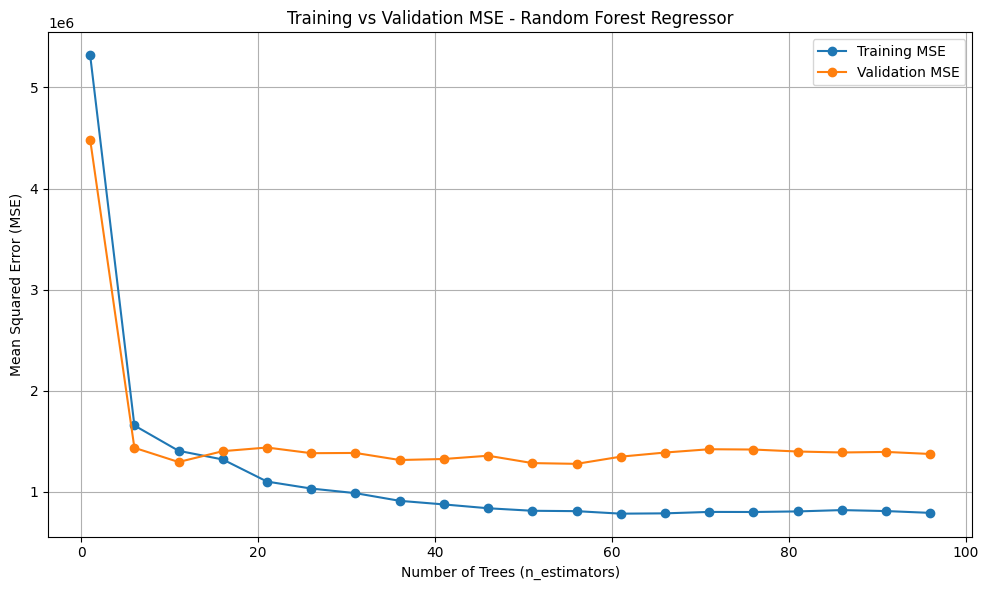

📊 Model Evaluation:
R² Score: 0.8950
Mean Absolute Error (MAE): 851.01 (8.56%)
Root Mean Squared Error (RMSE): 1185.61 (11.92%)
Random Forest - {'r2': 0.8950020019136419, 'mae': 851.0092528735635, 'rmse': np.float64(1185.6088774040984), 'mae_percent': np.float64(8.55509527994098), 'rmse_percent': np.float64(11.918785696731897), 'loss_percent': 10.499799808635812}


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Your selected features
selected_features = [
    "enginesize", "curbweight", "highwaympg", "horsepower", "carwidth",
    "carlength", "wheelbase", "citympg", "peakrpm", "stroke"
]

# Select features and target
X = clean_df[selected_features]
y = clean_df['price']

# Split data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Store MSE for different numbers of trees
train_mse = []
val_mse = []
n_estimators_range = range(1, 101, 5)  # Trees: 1 to 100 in steps of 5

for n in n_estimators_range:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_val_pred = rf.predict(X_test)

    train_mse.append(mean_squared_error(y_train, y_train_pred))
    val_mse.append(mean_squared_error(y_test, y_val_pred))

# Plot the Training vs Validation MSE
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_mse, label='Training MSE', marker='o')
plt.plot(n_estimators_range, val_mse, label='Validation MSE', marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs Validation MSE - Random Forest Regressor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔁 Final evaluation with full 100-tree model
final_rf = RandomForestRegressor(n_estimators=100, random_state=42)
final_rf.fit(X_train, y_train)
y_pred_rf = final_rf.predict(X_test)

# ✅ Print your original evaluation result
print(f"Random Forest - {evaluate_regression_model(y_test, y_pred_rf)}")


Applying K Fold Validation on Random Forest Regressor

📊 Model Evaluation:
R² Score: 0.7755
Mean Absolute Error (MAE): 1391.47 (12.82%)
Root Mean Squared Error (RMSE): 2216.41 (20.42%)
📊 Model Evaluation:
R² Score: 0.7647
Mean Absolute Error (MAE): 1658.05 (13.94%)
Root Mean Squared Error (RMSE): 2307.02 (19.40%)
🔁 2-Fold CV - Avg R²: 0.7701
📊 Model Evaluation:
R² Score: 0.8548
Mean Absolute Error (MAE): 1004.64 (9.57%)
Root Mean Squared Error (RMSE): 1596.72 (15.21%)
📊 Model Evaluation:
R² Score: 0.8194
Mean Absolute Error (MAE): 1434.71 (12.65%)
Root Mean Squared Error (RMSE): 2094.75 (18.46%)
📊 Model Evaluation:
R² Score: 0.7991
Mean Absolute Error (MAE): 1539.49 (12.53%)
Root Mean Squared Error (RMSE): 2201.78 (17.92%)
🔁 3-Fold CV - Avg R²: 0.8244
📊 Model Evaluation:
R² Score: 0.9100
Mean Absolute Error (MAE): 849.63 (8.07%)
Root Mean Squared Error (RMSE): 1177.37 (11.18%)
📊 Model Evaluation:
R² Score: 0.7619
Mean Absolute Error (MAE): 1689.76 (15.11%)
Root Mean Squared Error (RMSE): 2588.85 (23.15%)
📊 Model Evaluation:
R² Score: 0.845

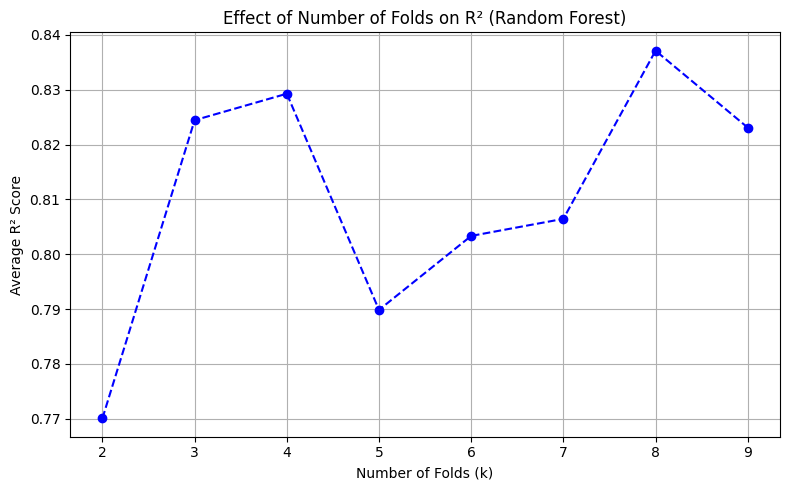

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

selected_features = [
    "enginesize", "curbweight", "highwaympg", "horsepower", "carwidth",
    "carlength", "wheelbase", "citympg", "peakrpm", "stroke"
]

# Select features and target
X = clean_df[selected_features]
y = clean_df['price']

# Range of fold values to test
fold_values = [2,3,4,5,6,7,8,9]
average_r2_scores = []

# Loop through each fold setting
for k in fold_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_r2_scores = []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        metrics = evaluate_regression_model(y_val, y_pred)
        fold_r2_scores.append(metrics['r2'])

    avg_r2 = np.mean(fold_r2_scores)
    average_r2_scores.append(avg_r2)
    print(f"🔁 {k}-Fold CV - Avg R²: {avg_r2:.4f}")

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(fold_values, average_r2_scores, marker='o', linestyle='--', color='blue')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Average R² Score')
plt.title('Effect of Number of Folds on R² (Random Forest)')
plt.grid(True)
plt.xticks(fold_values)
plt.tight_layout()
plt.show()


Trying L2 Ridge Regression Model

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define selected features
selected_features = [
    "enginesize", "curbweight", "highwaympg", "horsepower", "carwidth",
    "carlength", "wheelbase", "citympg", "peakrpm", "stroke"
]

# Select features and target
X = clean_df[selected_features]
y = clean_df['price']

# Split data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=0.01)

# Train the model
ridge.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge.predict(X_test)


evaluate_regression_model(y_test, y_pred_ridge)

📊 Model Evaluation:
R² Score: 0.7516
Mean Absolute Error (MAE): 1239.88 (12.46%)
Root Mean Squared Error (RMSE): 1823.62 (18.33%)


{'r2': 0.7515907016591943,
 'mae': 1239.877012164444,
 'rmse': np.float64(1823.622144007317),
 'mae_percent': np.float64(12.46433683142492),
 'rmse_percent': np.float64(18.332657540341415),
 'loss_percent': 24.840929834080573}

Applying XGBoost ALgorithm

In [69]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
import numpy as np

# Example: replace this with your actual evaluation function
# def evaluate_regression_model(y_true, y_pred):
#     from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#     mse = mean_squared_error(y_true, y_pred)
#     rmse = np.sqrt(mse)
#     return {
#         'r2': r2_score(y_true, y_pred),
#         'mae': mean_absolute_error(y_true, y_pred),
#         'mse': mse,
#         'rmse': rmse
#     }

average_metrics_scores = {'r2': [], 'mae': [], 'mse': [], 'rmse': []}
fold_values = [2,3,4,5,6,7,8,9]
for k in fold_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_metrics = {'r2': [], 'mae': [], 'mse': [], 'rmse': []}

    print(f"\n🔁 {k}-Fold Cross Validation using XGBoost:")

    for fold_num, (train_idx, val_idx) in enumerate(kf.split(X), start=1):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # ⚡ Using XGBoost instead of Random Forest
        xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, verbosity=0)
        xgb.fit(X_train, y_train)

        y_pred = xgb.predict(X_val)
        metrics = evaluate_regression_model(y_val, y_pred)

        print(f"  📂 Fold {fold_num}: ", end="")
        print(" | ".join([f"{k.upper()}: {v:.4f}" for k, v in metrics.items()]))

        for key in fold_metrics:
            fold_metrics[key].append(metrics[key])

    print(f"✅ Average metrics over {k} folds:")
    for key in fold_metrics:
        avg_score = np.mean(fold_metrics[key])
        average_metrics_scores[key].append(avg_score)
        print(f"   ➤ {key.upper()}: {avg_score:.4f}")



🔁 2-Fold Cross Validation using XGBoost:
📊 Model Evaluation:
R² Score: 0.7552
Mean Absolute Error (MAE): 1590.62 (14.65%)
Root Mean Squared Error (RMSE): 2314.40 (21.32%)
  📂 Fold 1: R2: 0.7552 | MAE: 1590.6192 | RMSE: 2314.4020 | MAE_PERCENT: 14.6521 | RMSE_PERCENT: 21.3193 | LOSS_PERCENT: 24.4819


KeyError: 'mse'

By testing out above models we found out t Random Forest Regressor performs the best  with the following metrics

*   R² Score: 0.8950
*   Mean Absolute Error (MAE): 851.01 (8.56%)
*   Root Mean Squared Error (RMSE): 1185.61 (11.92%)
On average or prediction is off by only 8.56%

Feature Importance (Weightage) in Prediction in Random Forest Regressor

📊 Model Evaluation:
R² Score: 0.8950
Mean Absolute Error (MAE): 851.01 (8.56%)
Root Mean Squared Error (RMSE): 1185.61 (11.92%)
Random Forest - {'r2': 0.8950020019136419, 'mae': 851.0092528735635, 'rmse': np.float64(1185.6088774040984), 'mae_percent': np.float64(8.55509527994098), 'rmse_percent': np.float64(11.918785696731897), 'loss_percent': 10.499799808635812}
      Feature  Importance
1  curbweight   52.717143
3  horsepower   12.668799
2  highwaympg    9.216495
5   carlength    6.601616
6   wheelbase    4.979200
4    carwidth    4.500372
7     citympg    3.069268
0  enginesize    2.414702
8     peakrpm    2.168711
9      stroke    1.663693


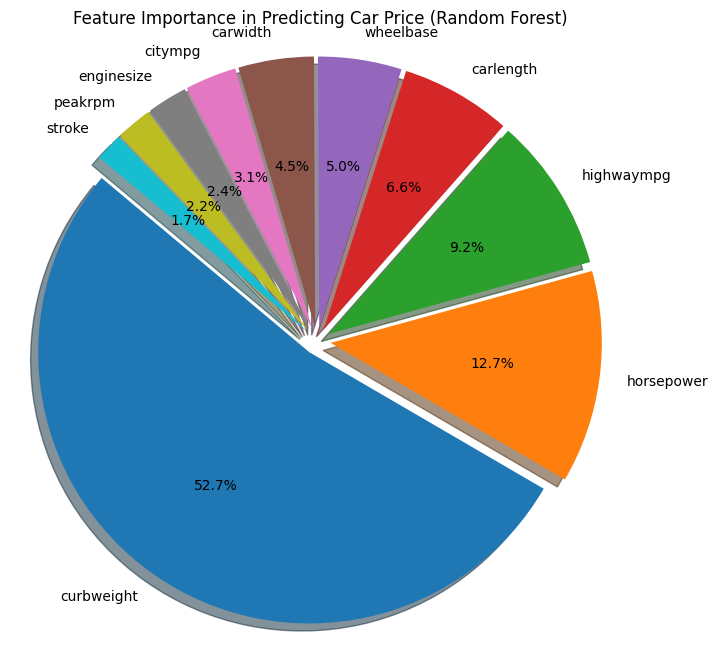

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Your selected features
selected_features = [
    "enginesize", "curbweight", "highwaympg", "horsepower", "carwidth",
    "carlength", "wheelbase", "citympg", "peakrpm", "stroke"
]

# Select features and target
X = clean_df[selected_features]
y = clean_df['price']

# Split data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Store MSE for different numbers of trees
train_mse = []
val_mse = []
n_estimators_range = range(1, 101, 5)  # Trees: 1 to 100 in steps of 5

for n in n_estimators_range:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_val_pred = rf.predict(X_test)

    train_mse.append(mean_squared_error(y_train, y_train_pred))
    val_mse.append(mean_squared_error(y_test, y_val_pred))

# 🔁 Final evaluation with full 100-tree model
final_rf = RandomForestRegressor(n_estimators=100, random_state=42)
final_rf.fit(X_train, y_train)
y_pred_rf = final_rf.predict(X_test)

# ✅ Print your original evaluation result
print(f"Random Forest - {evaluate_regression_model(y_test, y_pred_rf)}")
importances = final_rf.feature_importances_

# Create a DataFrame for visualization and understanding
feat_imp_df = pd.DataFrame({
    "Feature": selected_features,
    "Importance": importances * 100  # Convert to percentage
}).sort_values(by="Importance", ascending=False)

# Display
print(feat_imp_df)

# 📈 Pie chart for feature importances
plt.figure(figsize=(8, 8))
plt.pie(
    feat_imp_df['Importance'],
    labels=feat_imp_df['Feature'],
    autopct='%1.1f%%',
    startangle=140,
    explode=[0.05]*len(feat_imp_df),  # Slightly separate each slice
    shadow=True
)
plt.title('Feature Importance in Predicting Car Price (Random Forest)')
plt.axis('equal')  # Equal aspect ratio to ensure pie is a circle
plt.show()

Earlier after handling outliers some of them were left which were majorly in these features

compressionratio             23
stroke                       16
carwidth                      3
carlength                     1

We dont have compressionratio in our model but we have carwidth, carlength and stroke

Lets try dropping these three features and evaluating our model again

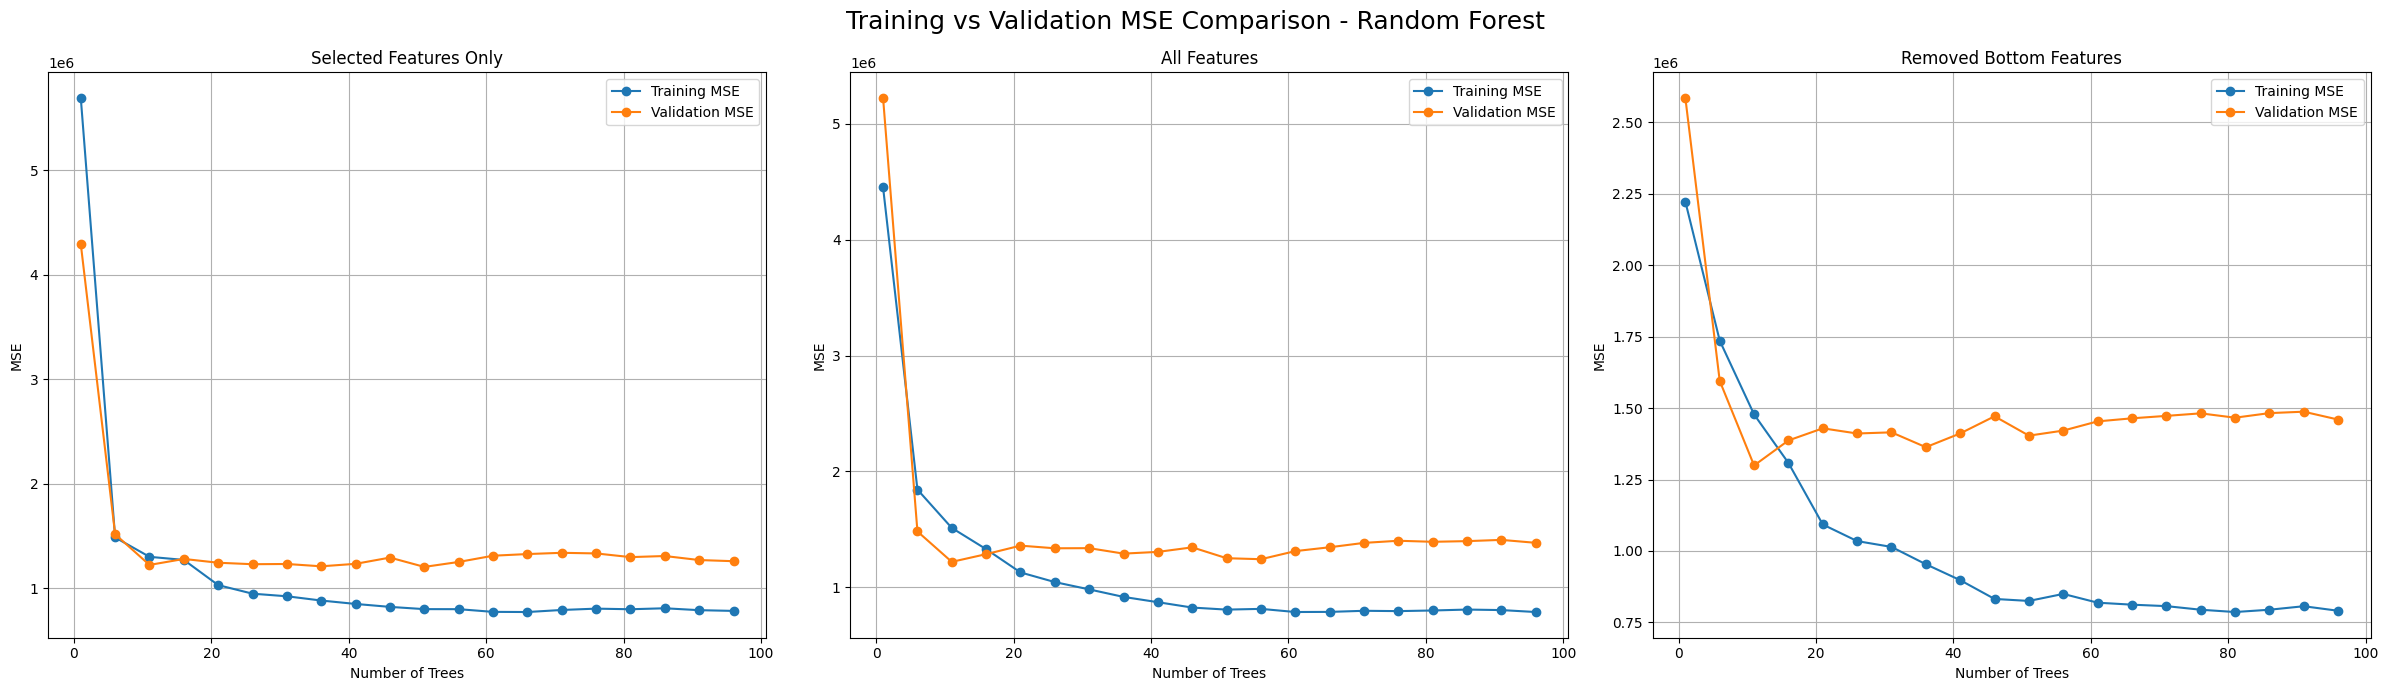

📊 Model Evaluation:
R² Score: 0.9049
Mean Absolute Error (MAE): 782.96 (7.87%)
Root Mean Squared Error (RMSE): 1128.44 (11.34%)
Selected Features: {'r2': 0.9048842786326055, 'mae': 782.962931034483, 'rmse': np.float64(1128.4363982404373), 'mae_percent': np.float64(7.871033661554143), 'rmse_percent': np.float64(11.344037531557445), 'loss_percent': 9.511572136739455}
📊 Model Evaluation:
R² Score: 0.8942
Mean Absolute Error (MAE): 847.69 (8.52%)
Root Mean Squared Error (RMSE): 1189.90 (11.96%)
All Features: {'r2': 0.8942401964651107, 'mae': 847.6931609195401, 'rmse': np.float64(1189.9021541987233), 'mae_percent': np.float64(8.521759000073374), 'rmse_percent': np.float64(11.961945500126694), 'loss_percent': 10.575980353488934}
📊 Model Evaluation:
R² Score: 0.8889
Mean Absolute Error (MAE): 863.47 (8.68%)
Root Mean Squared Error (RMSE): 1219.55 (12.26%)
Removed Bottom Features: {'r2': 0.8889042895918855, 'mae': 863.4724137931034, 'rmse': np.float64(1219.5499094699335), 'mae_percent': np.flo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 📌 Features
selected_features = ["enginesize", "curbweight", "highwaympg", "horsepower", "wheelbase", "citympg", "peakrpm"]
all_features = ["enginesize", "curbweight", "highwaympg", "horsepower", "wheelbase", "citympg", "peakrpm", "stroke", "carwidth", "carlength"]
removing_bottom = ["curbweight", "highwaympg", "horsepower", "wheelbase", "carwidth", "carlength"]
#"citympg", "peakrpm", "stroke", enginesize",
# 📌 Prepare X and y
X_selected = clean_df[selected_features]
X_all = clean_df[all_features]
X_removing_bottom = clean_df[removing_bottom]
y = clean_df['price']

# 📌 Split
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)
X_train_rem, X_test_rem, y_train_rem, y_test_rem = train_test_split(X_removing_bottom, y, test_size=0.2, random_state=42)

# 📌 For storing results
train_mse_sel, val_mse_sel = [], []
train_mse_all, val_mse_all = [], []
train_mse_rem, val_mse_rem = [], []

n_estimators_range = range(1, 101, 5)

# 📌 Selected Features Training
for n in n_estimators_range:
    rf_sel = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_sel.fit(X_train_sel, y_train_sel)
    y_train_pred_sel = rf_sel.predict(X_train_sel)
    y_val_pred_sel = rf_sel.predict(X_test_sel)
    train_mse_sel.append(mean_squared_error(y_train_sel, y_train_pred_sel))
    val_mse_sel.append(mean_squared_error(y_test_sel, y_val_pred_sel))

# 📌 All Features Training
for n in n_estimators_range:
    rf_all = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_all.fit(X_train_all, y_train_all)
    y_train_pred_all = rf_all.predict(X_train_all)
    y_val_pred_all = rf_all.predict(X_test_all)
    train_mse_all.append(mean_squared_error(y_train_all, y_train_pred_all))
    val_mse_all.append(mean_squared_error(y_test_all, y_val_pred_all))

# 📌 Removing Bottom Features Training
for n in n_estimators_range:
    rf_rem = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_rem.fit(X_train_rem, y_train_rem)
    y_train_pred_rem = rf_rem.predict(X_train_rem)
    y_val_pred_rem = rf_rem.predict(X_test_rem)
    train_mse_rem.append(mean_squared_error(y_train_rem, y_train_pred_rem))
    val_mse_rem.append(mean_squared_error(y_test_rem, y_val_pred_rem))

# 📈 Plotting side-by-side
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

# Selected Features
axes[0].plot(n_estimators_range, train_mse_sel, label='Training MSE', marker='o')
axes[0].plot(n_estimators_range, val_mse_sel, label='Validation MSE', marker='o')
axes[0].set_title('Selected Features Only')
axes[0].set_xlabel('Number of Trees')
axes[0].set_ylabel('MSE')
axes[0].legend()
axes[0].grid(True)

# All Features
axes[1].plot(n_estimators_range, train_mse_all, label='Training MSE', marker='o')
axes[1].plot(n_estimators_range, val_mse_all, label='Validation MSE', marker='o')
axes[1].set_title('All Features')
axes[1].set_xlabel('Number of Trees')
axes[1].set_ylabel('MSE')
axes[1].legend()
axes[1].grid(True)

# Removing Bottom Features
axes[2].plot(n_estimators_range, train_mse_rem, label='Training MSE', marker='o')
axes[2].plot(n_estimators_range, val_mse_rem, label='Validation MSE', marker='o')
axes[2].set_title('Removed Bottom Features')
axes[2].set_xlabel('Number of Trees')
axes[2].set_ylabel('MSE')
axes[2].legend()
axes[2].grid(True)

plt.suptitle('Training vs Validation MSE Comparison - Random Forest', fontsize=18)
plt.tight_layout()
plt.show()

# ✅ Final evaluation using 100 trees
final_rf_sel = RandomForestRegressor(n_estimators=100, random_state=42)
final_rf_sel.fit(X_train_sel, y_train_sel)
y_pred_sel = final_rf_sel.predict(X_test_sel)

final_rf_all = RandomForestRegressor(n_estimators=100, random_state=42)
final_rf_all.fit(X_train_all, y_train_all)
y_pred_all = final_rf_all.predict(X_test_all)

final_rf_rem = RandomForestRegressor(n_estimators=100, random_state=42)
final_rf_rem.fit(X_train_rem, y_train_rem)
y_pred_rem = final_rf_rem.predict(X_test_rem)

# 📊 Evaluate (using your existing evaluate_regression_model)
print(f"Selected Features: {evaluate_regression_model(y_test_sel, y_pred_sel)}")
print(f"All Features: {evaluate_regression_model(y_test_all, y_pred_all)}")
print(f"Removed Bottom Features: {evaluate_regression_model(y_test_rem, y_pred_rem)}")


By removing carwidth carlength and stroke we improved the mae from 851.01(8.56%) and rmse 1185.61(11.92%) to 782.96(7.87%) and rmse 1128.44(11.34%) respectively

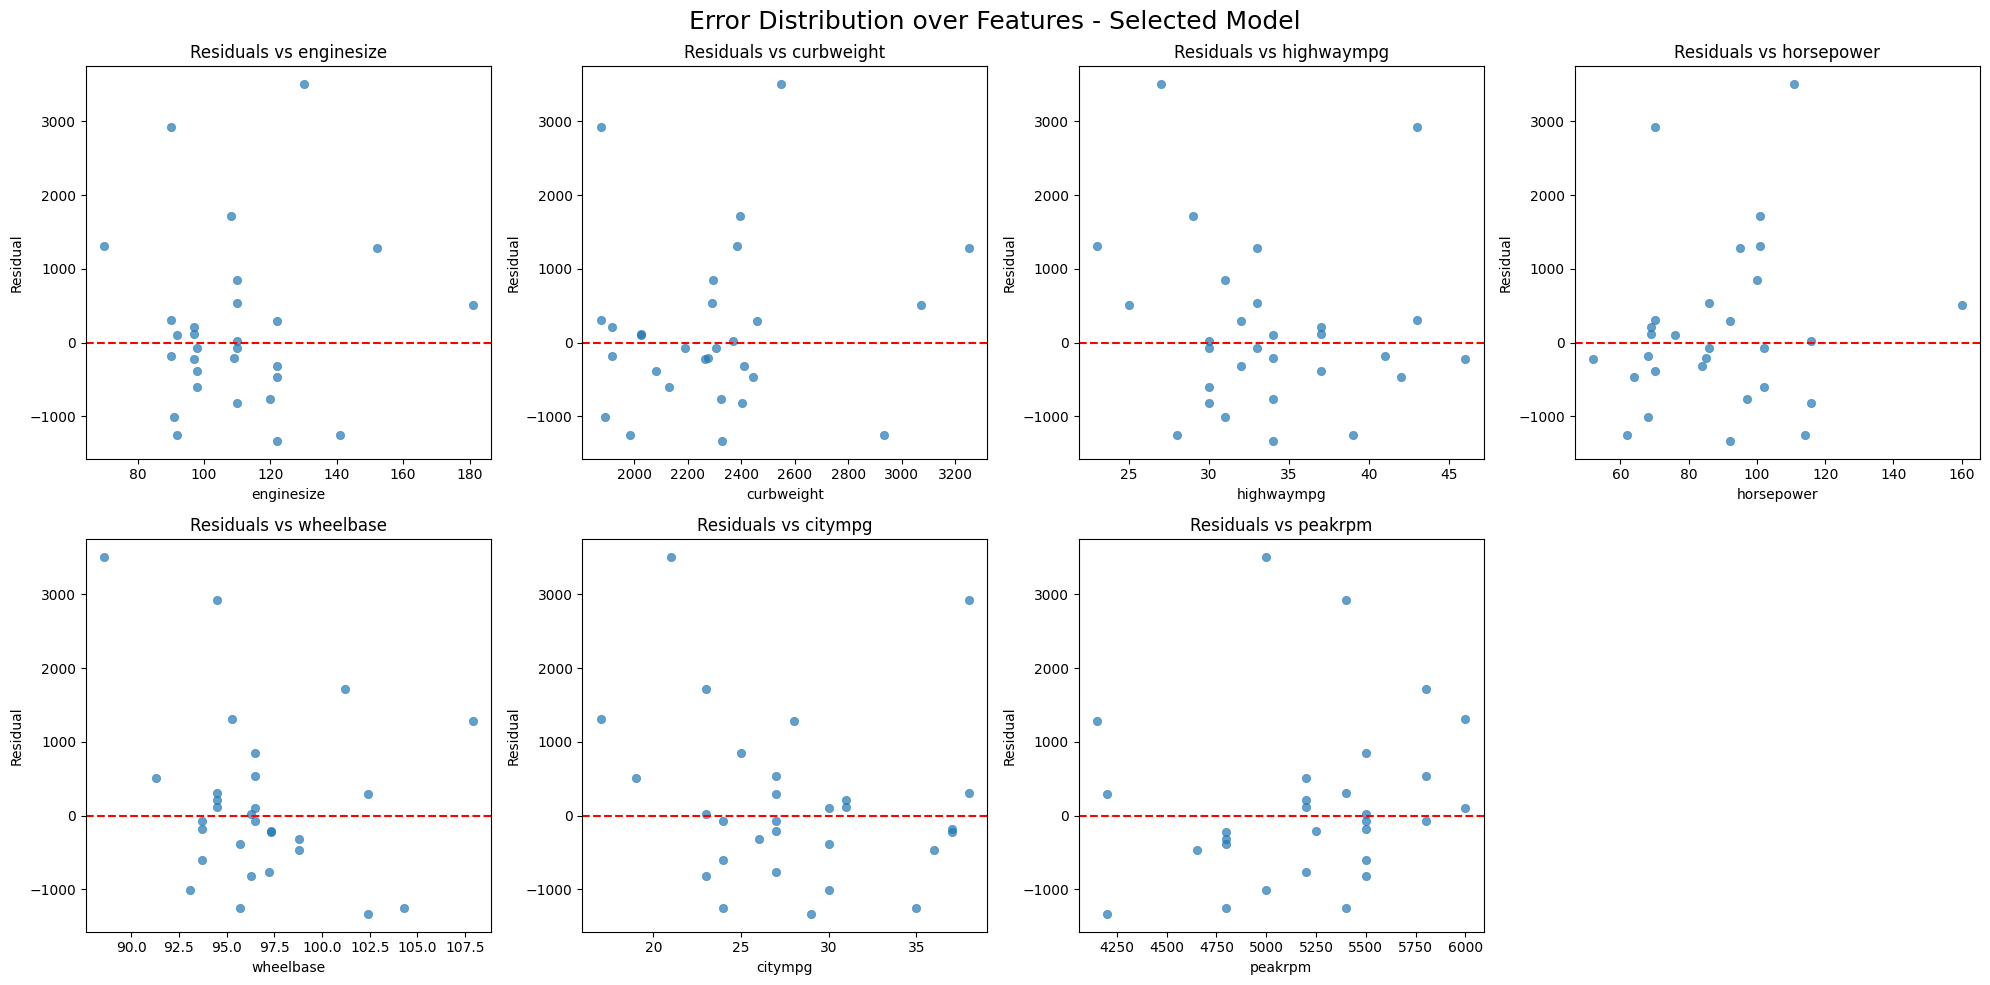

In [ ]:
import seaborn as sns

# Residuals for selected model
residuals_sel = y_test_sel - y_pred_sel
X_test_sel_with_error = X_test_sel.copy()
X_test_sel_with_error['Residual'] = residuals_sel

# Scatter plot: Residual vs each feature
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for idx, feature in enumerate(X_test_sel.columns):
    sns.scatterplot(data=X_test_sel_with_error, x=feature, y='Residual', ax=axes[idx], alpha=0.7, edgecolor=None)
    axes[idx].axhline(0, color='red', linestyle='--')
    axes[idx].set_title(f'Residuals vs {feature}')

# Hide any unused subplots
for i in range(len(X_test_sel.columns), len(axes)):
    axes[i].axis('off')

plt.suptitle('Error Distribution over Features - Selected Model', fontsize=18)
plt.tight_layout()
plt.show()


In the Chart we have to look at this like:--

If a point is high above 0 → model underpredicted (price was more than predicted).
If a point is below 0 → model overpredicted (price was less than predicted).

"Wider spread = feature contributes more to prediction error.
Tighter spread = feature is well captured by the model."

OBSERVATIONS

Enginesize :- Mostly random around 0, but a few big errors. Generally fine, but extreme enginesizes (very big/small) have larger errors.

Curbweight :- Similar: small errors most of the time, occasional big ones. Heavy/light cars could cause trouble.

Highwaympg :- No obvious pattern, decent spread. Good.

Horsepower :- Slight cluster at certain values, otherwise okay. Might be fine — maybe slightly worse for very high horsepower.

Wheelbase  :- Clean. Residuals centered nicely. Good fit!

Citympg    :- Similar to highwaympg, random spread. Good fit.

Peakrpm    :- Few larger errors when RPMs are high. Maybe a signal that peakrpm extremes are tricky for model.

FINAL THOUGHTS

“For most normal cars, our model predicts well.”

“However, for cars with very big engines or very light weights, our model tends to make bigger mistakes.”

"If the client is selling cars with extreme specs, we might need a better model or more data to cover those.”

We use MAE as our main evaluation metric because it directly tells us the average error in dollar (or rupee) terms, which is easy to understand and highly relevant to our business problem of pricing. It treats overestimation and underestimation equally, giving a fair and practical measure of how our model would perform in real-world conditions.